# Table of Content

## 1. Collect & Store Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from operator import attrgetter

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from prefixspan import PrefixSpan
import networkx as nx

from datetime import timedelta

In [2]:
def ingest_as_df(data_name):
    path = '/Users/thailinhpham/Downloads/Python/hftf/data/' + data_name
    xls = pd.ExcelFile(path)
    return pd.read_excel(xls)

In [3]:
data_bills = ingest_as_df('2. bills.xlsx')
data_users = ingest_as_df('3. users.xlsx')
data_products = ingest_as_df('4. products.xlsx') 
data_occasions = ingest_as_df('5. occasions.xlsx')
data_relationships = ingest_as_df('6. relationships.xlsx')
data_user_relationships = ingest_as_df('7. user_relationships.xlsx')
data_overview = [data_bills, data_users, data_products, data_occasions, data_relationships, data_user_relationships]
data_overview_dict = {
    'bills': data_bills,
    'users': data_users,
    'products': data_products,
    'occasions': data_occasions,
    'relationships': data_relationships,
    'user_relationships': data_user_relationships
}

In [4]:
# check
data_bills

,_id,customer_id,master_id,country_id,summary.grand_total,summary.discount.money,summary.commission,to_user.location.province_id,to_user.relationship_id,to_user.occasion_id,to_user.relative_id,to_user.date,create_info.created
0,5c2ca5fd819a4edc2e65eb36,5a5ea602652fe8de52ecb5cf,6066c157066c9a03055f2b10,MO,150000d,0.0,30000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc900756bcb11219006029,2019-01-09T02:00:00.000Z,2019-01-02T11:52:29.714Z
1,5c2f17cc819a4eb96065eb26,5c2f17cc819a4eb96065eb25,6066c157066c9a03055f2b10,VN,1350000d,NaN,270000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc701a56bcb11219005312,2019-01-05T00:00:00.000Z,2019-01-04T08:22:36.831Z
2,5c2c9162819a4e681965eb4f,5bf60ee0819a4e76518c6393,6066c157066c9a03055f2b10,VN,500000vnd,NaN,100000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc730756bcb11219005467,2019-01-01T03:00:00.000Z,2019-01-02T10:24:34.952Z
3,5c2f2fad819a4e865065eb39,5a1cf33e652fe8c33d030d6f,6066c157066c9a03055f2b10,US,800000vnd,NaN,160000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc99f556bcb112190063f8,2019-01-07T02:00:00.000Z,2019-01-04T10:04:29.107Z
4,5c35b574819a4e314f76c332,597f4d5c652fe882468b590b,6066c157066c9a03055f2b10,IL,500000vnd,NaN,100000,5016fd6b7f8b9ac842000000,NaN,NaN,62bca8b956bcb11219006a36,2019-01-10T02:00:00.000Z,2019-01-09T08:48:52.720Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,6535d8144a6a4d4fa005a6ae,6405c7adf2497cd09b02b0f6,6066c157066c9a03055f2b10,VN,210000vnd,0.0,26000,5016fd6b7f8b9ac842000000,62374c93d092b077820bd62f,62374e382511770c643d9a5a,6535d6f8496e105c1601e91b,2023-10-23T09:00:00.000Z,2023-10-23T02:19:00.226Z
6597,6536340b685b663e520da7e2,65362f2f058e39e1cf0ae5f3,6066cd65ca52cc506817d471,VN,178200d,0.0,30450,5016fd6c7f8b9ac84200003e,62374c93d092b077820bd62f,62374e382511770c643d9a5a,653632ec06ca66f2ec0d0b57,2023-10-24T11:00:00.000Z,2023-10-23T08:51:23.114Z
6598,6536340b685b663e520da7e3,65362f2f058e39e1cf0ae5f3,6066c157066c9a03055f2b10,VN,691200d,0.0,161200,5016fd6c7f8b9ac84200003e,62374c93d092b077820bd62f,62374e382511770c643d9a5a,653632ec06ca66f2ec0d0b57,2023-10-24T01:00:00.000Z,2023-10-23T08:51:23.114Z
6599,6536501b213d349ce10e1512,65364da659ec9f648f021e06,6066c157066c9a03055f2b10,VN,1318000vnd,0.0,345000,5016fd6b7f8b9ac842000000,62374c93d092b077820bd62f,62374e382511770c643d9a5a,653650f02961ebea9c0a91e3,2023-10-23T12:57:41.000Z,2023-10-23T10:59:44.912Z


## 2. Data preparation & transformation
##### (including exploration, data types, wrong/ missing values, standardization, outliers detection, feature extraction, etc...)

### 2.1. Rename columns

In [5]:
def data_overview():
    data_overview_dict = {
        'bills': data_bills,
        'users': data_users,
        'products': data_products,
        'occasions': data_occasions,
        'relationships': data_relationships,
        'user_relationships': data_user_relationships
    }
    for data_name, data_frame in data_overview_dict.items():
        df_name = 'data_' + data_name
        print('data name is: ', data_name.upper())
        print('dataframe name is: ', df_name)
        print('with info: ', '\n', data_frame.info())
        print('='*60)

In [6]:
data_overview()

data name is:  BILLS
dataframe name is:  data_bills
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           6601 non-null   object 
 1   customer_id                   6601 non-null   object 
 2   master_id                     6451 non-null   object 
 3   country_id                    6293 non-null   object 
 4    summary.grand_total          6601 non-null   object 
 5   summary.discount.money        5803 non-null   float64
 6    summary.commission           6163 non-null   object 
 7   to_user.location.province_id  6573 non-null   object 
 8   to_user.relationship_id       680 non-null    object 
 9   to_user.occasion_id           602 non-null    object 
 10  to_user.relative_id           5860 non-null   object 
 11  to_user.date                  6601 non-null   object 
 12  create_inf

In [7]:
# Remove head, tail space
data_bills.columns = data_bills.columns.str.strip()

# Rename the columns
data_bills.rename(columns={
    'summary.grand_total': 's_grand_total',
    'summary.discount.money': 's_discount_money',
    'summary.commission': 's_commission',
    'to_user.location.province_id': 'to_user_province_id',
    'to_user.relationship_id': 'to_user_relationship_id',
    'to_user.occasion_id': 'to_user_occasion_id',
    'to_user.relative_id': 'to_user_relative_id',
    'to_user.date': 'to_user_date',
    'create_info.created': 'create_info_created',
    'master_id': 'product_id'
}, inplace=True)

data_users.rename(columns={'_id': 'user_id', 'full_name': 'user_full_name'}, inplace=True)

data_products.rename(columns={'_id': 'product_id', 'name': 'product_name'}, inplace=True)

data_occasions.rename(columns={'_id': 'occasion_id', 'name': 'occasion_name'}, inplace=True)

data_relationships.rename(columns={'_id': 'relationship_id', 'name': 'relationship_name'}, inplace=True)

data_user_relationships.rename(columns={'_id': 'user_relationship_id', 'full_name': 'user_relationship_full_name'}, inplace=True)

In [8]:
data_overview()

data name is:  BILLS
dataframe name is:  data_bills
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      6601 non-null   object 
 1   customer_id              6601 non-null   object 
 2   product_id               6451 non-null   object 
 3   country_id               6293 non-null   object 
 4   s_grand_total            6601 non-null   object 
 5   s_discount_money         5803 non-null   float64
 6   s_commission             6163 non-null   object 
 7   to_user_province_id      6573 non-null   object 
 8   to_user_relationship_id  680 non-null    object 
 9   to_user_occasion_id      602 non-null    object 
 10  to_user_relative_id      5860 non-null   object 
 11  to_user_date             6601 non-null   object 
 12  create_info_created      6601 non-null   object 
dtypes: float64(1), object(12)


### 2.2. Prepare data_bills

In [9]:
def print_columns_with_nan(dataframe):
    for column in dataframe.columns:
        nan_count = dataframe[column].isna().sum()
        if nan_count > 0:
            print(f"Column '{column}' has {nan_count} NaN values.")
print_columns_with_nan(data_bills)

Column 'product_id' has 150 NaN values.
Column 'country_id' has 308 NaN values.
Column 's_discount_money' has 798 NaN values.
Column 's_commission' has 438 NaN values.
Column 'to_user_province_id' has 28 NaN values.
Column 'to_user_relationship_id' has 5921 NaN values.
Column 'to_user_occasion_id' has 5999 NaN values.
Column 'to_user_relative_id' has 741 NaN values.


,Total,Percent
to_user_occasion_id,5999,0.908802
to_user_relationship_id,5921,0.896985
s_discount_money,798,0.120891
to_user_relative_id,741,0.112256
s_commission,438,0.066354


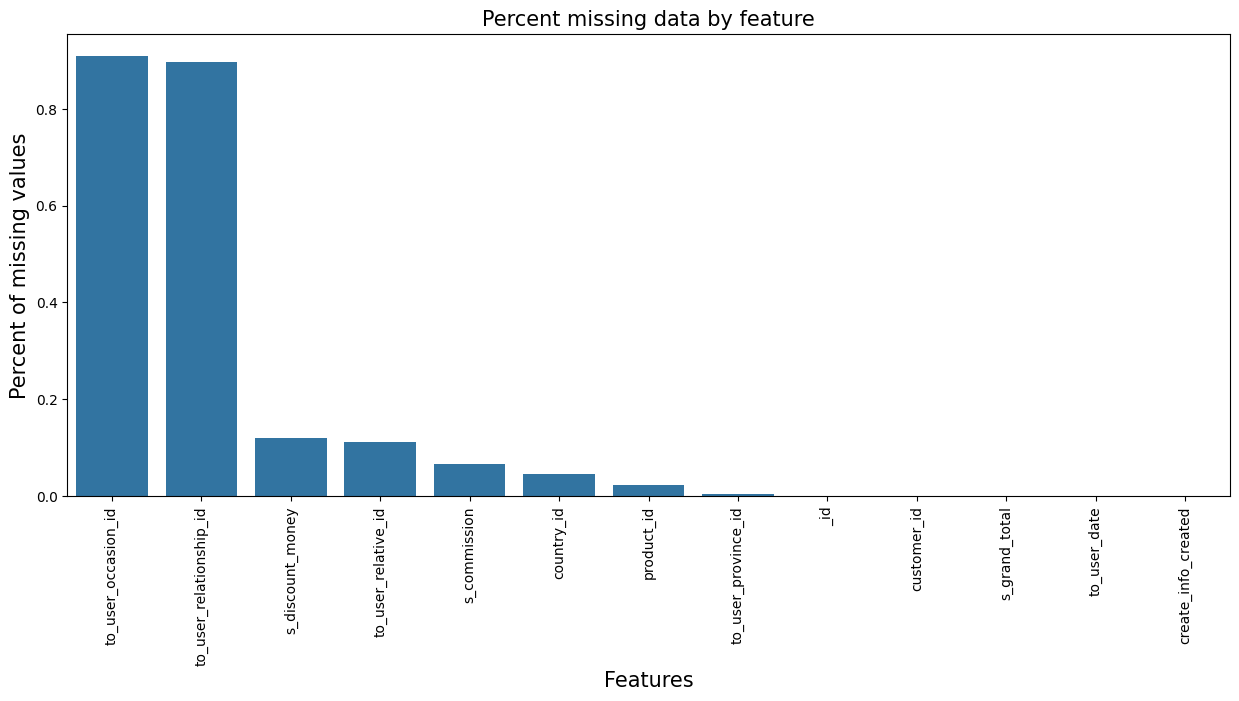

In [10]:
total = data_bills.isnull().sum().sort_values(ascending=False)
percent = (data_bills.isnull().sum()/data_bills.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='vertical')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [11]:
data_bills.head(3)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created
0,5c2ca5fd819a4edc2e65eb36,5a5ea602652fe8de52ecb5cf,6066c157066c9a03055f2b10,MO,150000d,0.0,30000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc900756bcb11219006029,2019-01-09T02:00:00.000Z,2019-01-02T11:52:29.714Z
1,5c2f17cc819a4eb96065eb26,5c2f17cc819a4eb96065eb25,6066c157066c9a03055f2b10,VN,1350000d,NaN,270000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc701a56bcb11219005312,2019-01-05T00:00:00.000Z,2019-01-04T08:22:36.831Z
2,5c2c9162819a4e681965eb4f,5bf60ee0819a4e76518c6393,6066c157066c9a03055f2b10,VN,500000vnd,NaN,100000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc730756bcb11219005467,2019-01-01T03:00:00.000Z,2019-01-02T10:24:34.952Z


In [12]:
data_bills['country_id'].unique()

array(['MO', 'VN', 'US', 'IL', 'GB', 'FR', 'DE', 'HK', 'PL', 'ID', 'MY',
       'CA', 'MX', 'NL', 'SG', 'CH', 'AU', 'KR', 'TH', 'KH', 'RU', 'IT',
       'TW', 'SE', nan, 'LK', 'IN', 'PH', 'FI', 'JP', 'KZ', 'TR', 'DK',
       'EE', 'NO', 'EG', 'UA', 'RS', 'HU', 'BE', 'SK', 'CN', 'GU', 'NZ',
       'BR', 'CM', 'IE', 'IS', 'LU', 'BD'], dtype=object)

In [13]:
data_bills_original = data_bills.copy()

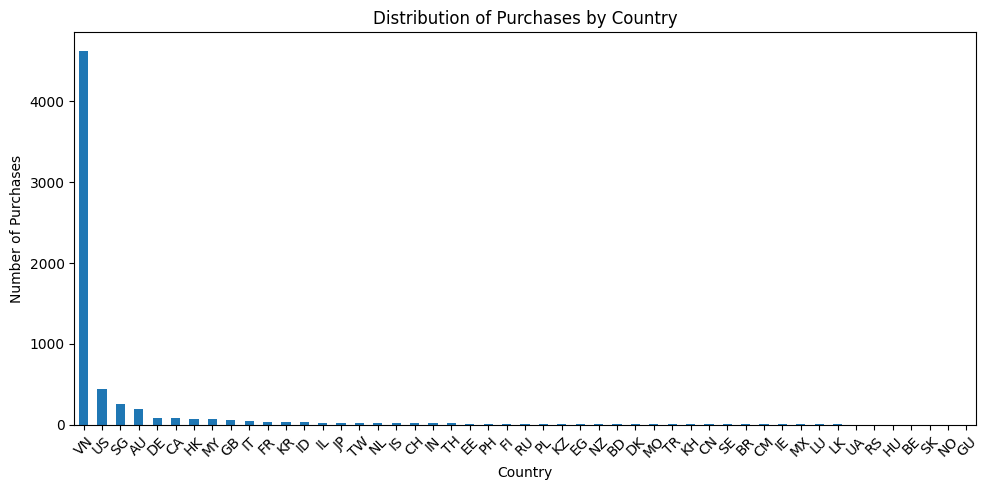

In [14]:
country_counts = data_bills['country_id'].value_counts()

country_counts.plot(kind='bar', figsize=(10, 5))

plt.title('Distribution of Purchases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

In [15]:
# Lọc data_bills để chỉ giữ lại record thị trường VN
data_bills = data_bills[data_bills['country_id'] == 'VN'].copy()

In [16]:
data_provinces = pd.read_csv("provinces.csv") # data được cung cấp sau khi btc bổ sung

In [17]:
data_provinces.rename(columns={'_id': 'province_id', 'name': 'province_name'}, inplace=True)
data_provinces['province_id'] = data_provinces['province_id'].str.extract(r'ObjectId\((.*?)\)', expand=False)

In [18]:
data_bills = data_bills.merge(data_provinces, how='left', left_on='to_user_province_id', right_on='province_id')

data_bills.rename(columns={'province_name': 'to_province'}, inplace=True)

data_bills.head(1)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created,province_id,to_province
0,5c2f17cc819a4eb96065eb26,5c2f17cc819a4eb96065eb25,6066c157066c9a03055f2b10,VN,1350000d,NaN,270000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc701a56bcb11219005312,2019-01-05T00:00:00.000Z,2019-01-04T08:22:36.831Z,5016fd6b7f8b9ac842000000,TP Hồ Chí Minh


In [19]:
data_bills.drop('province_id', axis=1, inplace=True)

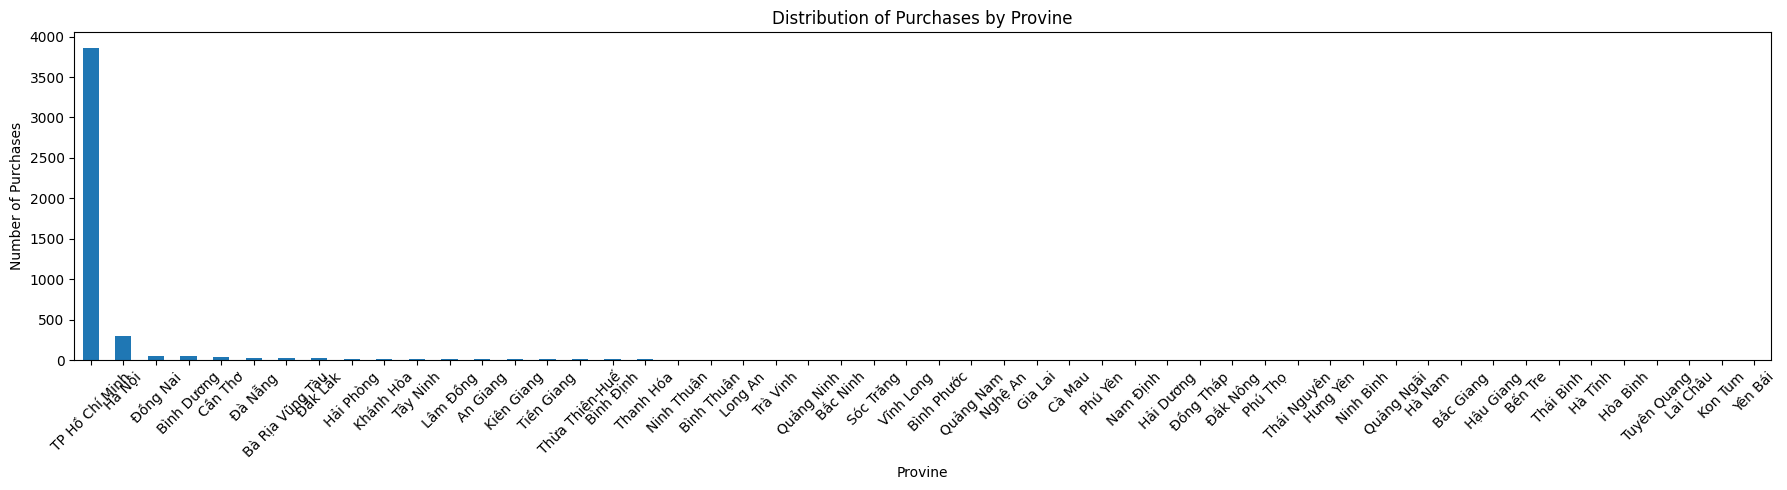

In [20]:
Provine_counts = data_bills['to_province'].value_counts()

Provine_counts.plot(kind='bar', figsize=(18, 5))

plt.title('Distribution of Purchases by Provine')
plt.xlabel('Provine')
plt.ylabel('Number of Purchases')

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

* In this case, I will not filter the destination is HCM city only, because the sender can be everywhere, but It could not deny a hypothesis that the sender are almost located in HCM city
* I focus on VN because the user located in Vietnam has been occupied the most, and it could be also good for customer behaviour analysis

In [21]:
data_bills['s_grand_total'] = data_bills['s_grand_total'].str.extract('(\d+)').astype(float)
print(data_bills['s_grand_total'])

0       1350000.0
1        500000.0
2        350000.0
3       2000000.0
4       1800000.0
          ...    
4619     105000.0
4620     210000.0
4621     178200.0
4622     691200.0
4623    1318000.0
Name: s_grand_total, Length: 4624, dtype: float64


In [22]:
data_bills.head(3)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created,to_province
0,5c2f17cc819a4eb96065eb26,5c2f17cc819a4eb96065eb25,6066c157066c9a03055f2b10,VN,1350000.0,NaN,270000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc701a56bcb11219005312,2019-01-05T00:00:00.000Z,2019-01-04T08:22:36.831Z,TP Hồ Chí Minh
1,5c2c9162819a4e681965eb4f,5bf60ee0819a4e76518c6393,6066c157066c9a03055f2b10,VN,500000.0,NaN,100000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc730756bcb11219005467,2019-01-01T03:00:00.000Z,2019-01-02T10:24:34.952Z,TP Hồ Chí Minh
2,5c302fd3819a4e230ef87988,5c2ce0de819a4eba2c65eb69,6066c157066c9a03055f2b10,VN,350000.0,NaN,70000,5016fd6b7f8b9ac842000000,NaN,NaN,62bc706356bcb11219005334,2019-01-07T02:00:00.000Z,2019-01-05T04:17:23.656Z,TP Hồ Chí Minh


In [23]:
def print_columns_with_nan(dataframe):
    for column in dataframe.columns:
        nan_count = dataframe[column].isna().sum()
        if nan_count > 0:
            print(f"Column '{column}' has {nan_count} NaN values.")
print_columns_with_nan(data_bills)

Column 'product_id' has 70 NaN values.
Column 's_grand_total' has 11 NaN values.
Column 's_discount_money' has 379 NaN values.
Column 's_commission' has 145 NaN values.
Column 'to_user_province_id' has 14 NaN values.
Column 'to_user_relationship_id' has 4142 NaN values.
Column 'to_user_occasion_id' has 4194 NaN values.
Column 'to_user_relative_id' has 453 NaN values.
Column 'to_province' has 14 NaN values.


### Note: Ưu tiên xử lý các features quan trọng trước như s_commision, s_discount_money, s_grand_total
### Rồi sau đó lọc outlier rồi mới xử lý tiếp những NaN value

In [24]:
data_bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      4624 non-null   object 
 1   customer_id              4624 non-null   object 
 2   product_id               4554 non-null   object 
 3   country_id               4624 non-null   object 
 4   s_grand_total            4613 non-null   float64
 5   s_discount_money         4245 non-null   float64
 6   s_commission             4479 non-null   object 
 7   to_user_province_id      4610 non-null   object 
 8   to_user_relationship_id  482 non-null    object 
 9   to_user_occasion_id      430 non-null    object 
 10  to_user_relative_id      4171 non-null   object 
 11  to_user_date             4624 non-null   object 
 12  create_info_created      4624 non-null   object 
 13  to_province              4610 non-null   object 
dtypes: float64(2), object(12

In [25]:
def commission_conversion(row):
    if row['s_commission'] == ' -   ':
        # Calculate 20% of s_grand_total if s_commission is ' -   '
        return float(row['s_grand_total']) * 20 / 100
    else:
        return float(row['s_commission'])  # Otherwise, just convert to float

mask = data_bills['s_commission'] == ' -   '
data_bills.loc[mask, 's_commission'] = data_bills[mask].apply(commission_conversion, axis=1)

# Now let's ensure that the entire s_commission column is float
data_bills['s_commission'] = data_bills['s_commission'].astype(float)

In [26]:
mask = data_bills['s_grand_total'].isna()
data_bills.loc[mask, 's_grand_total'] = data_bills.loc[mask, 's_commission'] * 100 / 20

print(data_bills['s_grand_total'].unique())

[1350000.  500000.  350000. ...  957744.  340200. 1318000.]


In [27]:
data_bills['to_user_date'] = pd.to_datetime(data_bills['to_user_date'], errors='coerce', utc=True)
data_bills['create_info_created'] = pd.to_datetime(data_bills['create_info_created'], errors='coerce', utc=True)

In [28]:
data_bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   _id                      4624 non-null   object             
 1   customer_id              4624 non-null   object             
 2   product_id               4554 non-null   object             
 3   country_id               4624 non-null   object             
 4   s_grand_total            4615 non-null   float64            
 5   s_discount_money         4245 non-null   float64            
 6   s_commission             4473 non-null   float64            
 7   to_user_province_id      4610 non-null   object             
 8   to_user_relationship_id  482 non-null    object             
 9   to_user_occasion_id      430 non-null    object             
 10  to_user_relative_id      4171 non-null   object             
 11  to_user_date             4624 

In [29]:
data_bills_no_outliers = data_bills.copy()  

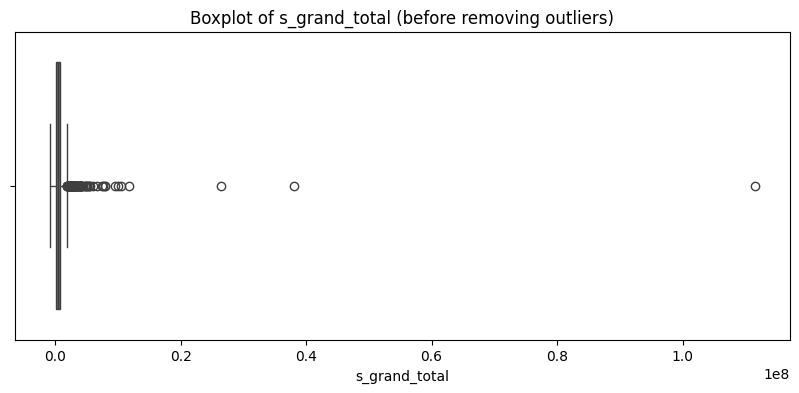

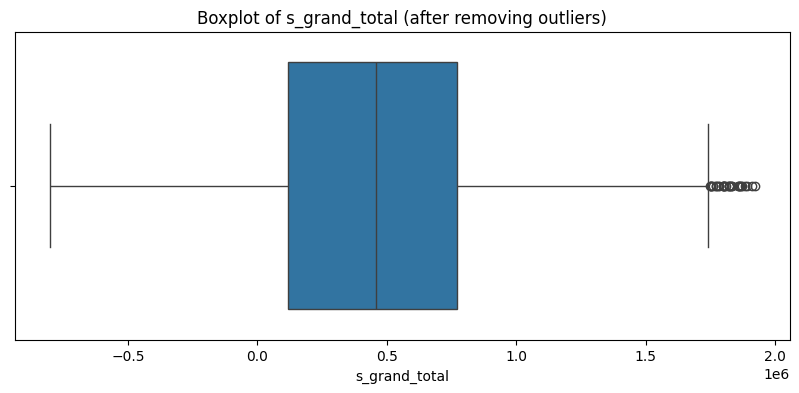

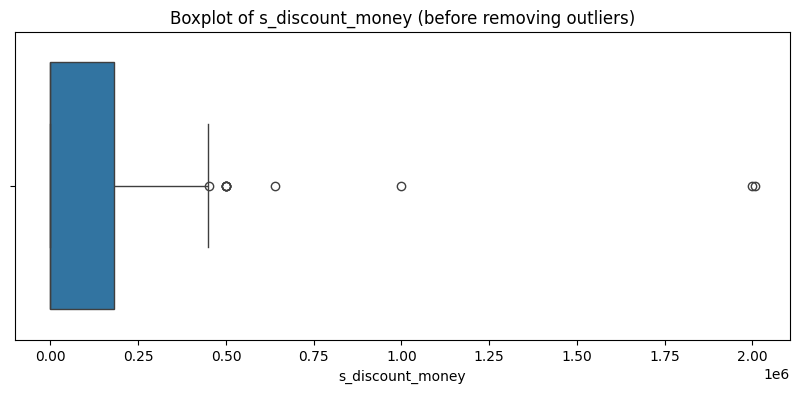

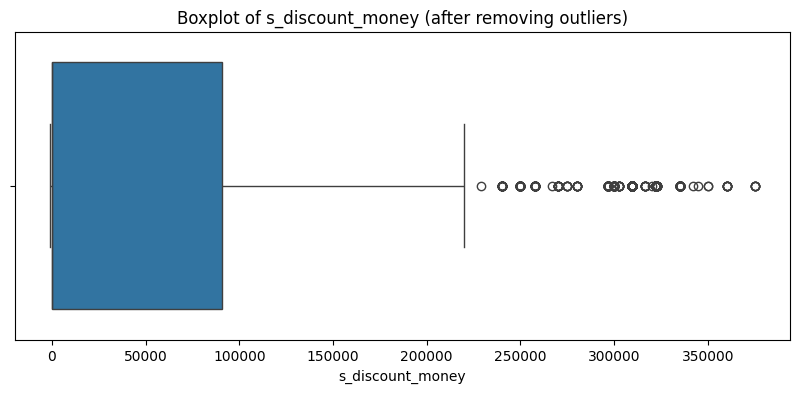

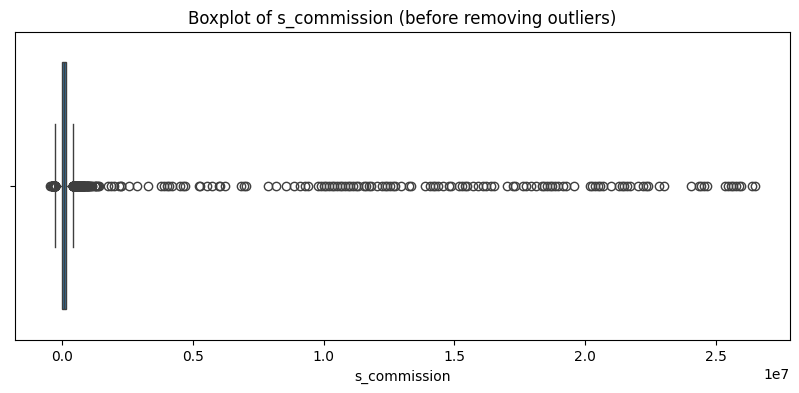

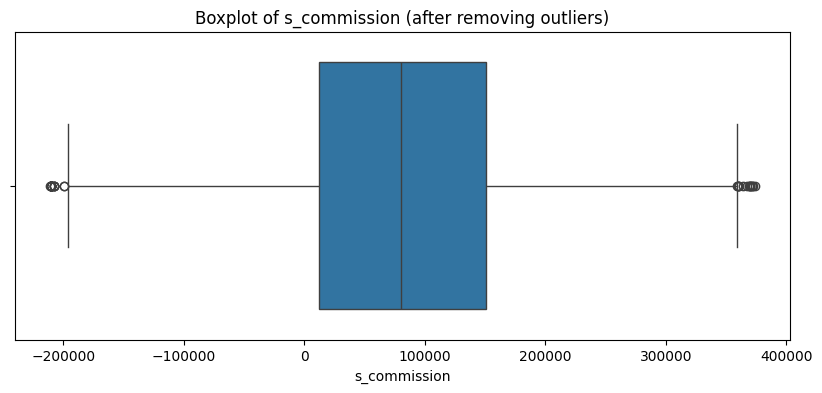

In [30]:
# lower and upper bounds for outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data_bills_no_outliers = remove_outliers_iqr(data_bills_no_outliers, 's_grand_total')

data_bills_no_outliers = remove_outliers_iqr(data_bills_no_outliers, 's_discount_money')

data_bills_no_outliers = remove_outliers_iqr(data_bills_no_outliers, 's_commission')

for column in ['s_grand_total', 's_discount_money', 's_commission']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_bills[column])
    plt.title(f'Boxplot of {column} (before removing outliers)')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_bills_no_outliers[column])
    plt.title(f'Boxplot of {column} (after removing outliers)')
    plt.show()

In [31]:
# I accept the result, now i will make it to main dataframe
data_bills = data_bills_no_outliers.copy()

In [32]:
def check_negative(col):
    negative_values = data_bills.loc[data_bills[col] < 0, col]
    
    if not negative_values.empty:
        print("Having negative values in ", col)
        if len(negative_values) < 600:
            print(negative_values.unique()) 
    else:
        print("No negative values in ", col)

check_list = ['s_grand_total', 's_discount_money', 's_commission']

for col in check_list:
    check_negative(col)

Having negative values in  s_grand_total
[-800000.]
Having negative values in  s_discount_money
[-1000.]
Having negative values in  s_commission
[-5.4400e+04 -2.8000e+03 -1.0200e+04 -2.8000e+04 -1.5920e+05 -1.1680e+05
 -1.1920e+05 -1.4900e+05 -1.9900e+05 -1.9620e+05 -1.8900e+05 -8.6000e+04
 -2.1000e+05 -1.4700e+05 -1.6000e+05 -1.8760e+05 -2.0760e+05 -1.4000e+05
 -1.6500e+05 -1.9000e+05 -1.3760e+05 -9.0000e+04 -1.4580e+05 -9.7640e+03
 -1.0420e+05 -1.8620e+05 -1.4340e+05 -1.4660e+05 -1.3200e+03 -1.8680e+04
 -8.1400e+03 -2.3200e+04 -2.0240e+04 -3.0200e+04 -2.0000e+02 -2.3500e+04
 -2.5480e+04 -8.4000e+03 -7.0000e+03 -1.0000e+04 -1.4000e+04 -2.2000e+03
 -2.0000e+04 -1.7400e+04 -2.9600e+02 -3.8000e+04 -4.9950e+04 -2.1083e+05
 -2.2575e+04 -2.0650e+04 -1.3750e+04 -2.3100e+04 -2.0200e+04 -2.5600e+04
 -2.2050e+04 -1.3325e+04 -1.6000e+03 -2.9850e+04 -3.2000e+04 -2.1300e+04]


In [33]:
# remove 1 rows 
data_bills = data_bills[data_bills['s_discount_money'] >= 0]

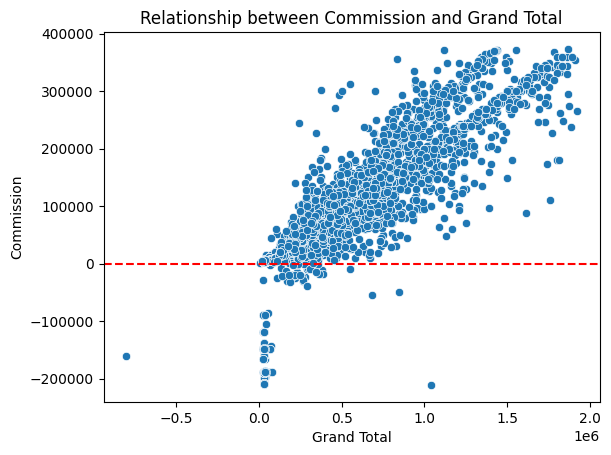

In [34]:
test_s_commission = data_bills[['s_commission', 's_grand_total']].copy()

sns.scatterplot(data=test_s_commission, x='s_grand_total', y='s_commission')
plt.title('Relationship between Commission and Grand Total')
plt.xlabel('Grand Total')
plt.ylabel('Commission')

plt.axhline(0, color='red', linestyle='--')

plt.show()

In [35]:
data_bills[data_bills['s_commission'] < 0].count()

_id                        177
customer_id                177
product_id                 177
country_id                 177
s_grand_total              177
s_discount_money           177
s_commission               177
to_user_province_id        177
to_user_relationship_id      5
to_user_occasion_id          6
to_user_relative_id        171
to_user_date               177
create_info_created        177
to_province                177
dtype: int64

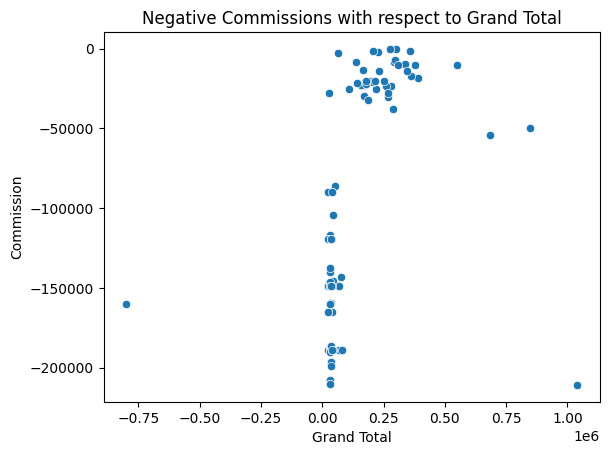

In [36]:
test_s_commission_negatives = data_bills[data_bills['s_commission'] < 0][['s_commission', 's_grand_total']].copy()

sns.scatterplot(data=test_s_commission_negatives, x="s_grand_total", y="s_commission")
plt.title('Negative Commissions with respect to Grand Total')
plt.xlabel('Grand Total')
plt.ylabel('Commission')
plt.show()

In [37]:
def print_columns_with_nan(dataframe):
    for column in dataframe.columns:
        nan_count = dataframe[column].isna().sum()
        if nan_count > 0:
            print(f"Column '{column}' has {nan_count} NaN values.")
print_columns_with_nan(data_bills)

Column 'product_id' has 6 NaN values.
Column 'to_user_province_id' has 13 NaN values.
Column 'to_user_relationship_id' has 3253 NaN values.
Column 'to_user_occasion_id' has 3298 NaN values.
Column 'to_user_relative_id' has 349 NaN values.
Column 'to_province' has 13 NaN values.


In [38]:
data_bills['product_id'].fillna('6066c157066c9a03055f2b10', inplace=True) # Hoa (dễ thấy ở các visualization sau)
data_bills['to_user_province_id'].fillna('5016fd6b7f8b9ac842000000', inplace=True) # hypothesis TPHCM
# data_bills['to_user_relationship_id'].fillna('62b43ee94a645a789f05dac2', inplace=True) # 'Một ai đó' 
# data_bills['to_user_relative_id'].fillna('62bc674256bcb11219004f32', inplace=True) # match ngược rela trả về 'Một ai đó' 
data_bills['to_province'].fillna('TP Hồ Chí Minh', inplace=True) # vì dữ liệu cho thấy đa số là tphcm
# data_bills['to_user_occasion_id'].fillna('62b44615e7faf931dd003dd6', inplace=True) # 'Dịp khác' 
fill_values = {
    'product_id': '6066c157066c9a03055f2b10',
    'to_user_province_id': '5016fd6b7f8b9ac842000000',
    # 'to_user_relationship_id': '62b43ee94a645a789f05dac2', 
    # 'to_user_relative_id': '62bc674256bcb11219004f32',
    'to_province': 'TP Hồ Chí Minh',
    # 'to_user_occasion_id': '62b44615e7faf931dd003dd6' 
}

data_bills.fillna(value=fill_values, inplace=True)

In [39]:
def print_columns_with_nan(dataframe):
    for column in dataframe.columns:
        nan_count = dataframe[column].isna().sum()
        if nan_count > 0:
            print(f"Column '{column}' has {nan_count} NaN values.")
print_columns_with_nan(data_bills)

Column 'to_user_relationship_id' has 3253 NaN values.
Column 'to_user_occasion_id' has 3298 NaN values.
Column 'to_user_relative_id' has 349 NaN values.


In [40]:
# in case rerun a part of code
if 's_profit' not in data_bills:
    data_bills['s_profit'] = pd.Series(0, index=data_bills.index)
    
data_bills['s_profit'] = data_bills['s_profit'].astype(float)

# data_bills['s_discount_money'] = data_bills['s_discount_money'].fillna(0)

data_bills['s_grand_total'] = data_bills['s_grand_total'].astype(float)
data_bills['s_commission'] = data_bills['s_commission'].astype(float)

In [41]:
data_bills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3705 entries, 24 to 4623
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   _id                      3705 non-null   object             
 1   customer_id              3705 non-null   object             
 2   product_id               3705 non-null   object             
 3   country_id               3705 non-null   object             
 4   s_grand_total            3705 non-null   float64            
 5   s_discount_money         3705 non-null   float64            
 6   s_commission             3705 non-null   float64            
 7   to_user_province_id      3705 non-null   object             
 8   to_user_relationship_id  452 non-null    object             
 9   to_user_occasion_id      407 non-null    object             
 10  to_user_relative_id      3356 non-null   object             
 11  to_user_date             3705 non-

In [42]:
data_bills.loc[data_bills['s_commission'] > 0, 's_profit'] = (
    data_bills['s_commission'] - data_bills['s_discount_money']
).astype(float)

data_bills.loc[data_bills['s_commission'] < 0, 's_profit'] = (
    0.2 * data_bills['s_grand_total'] - data_bills['s_discount_money'] - abs(data_bills['s_commission'])
).astype(float)

In [43]:
data_bills.head(3)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created,to_province,s_profit
24,5c4b83c7819a4e90043ec806,5bdafe20819a4eb22342cfaf,6066c157066c9a03055f2b10,VN,590000.0,0.0,118000.0,5016fd6b7f8b9ac842000000,NaN,NaN,62bc755256bcb11219005567,2019-01-26 04:00:00+00:00,2019-01-25 21:46:46.233000+00:00,TP Hồ Chí Minh,118000.0
179,5e3bf200f80636dc108b4569,5e3bf1fff80636dc108b4567,6066c157066c9a03055f2b10,VN,345000.0,0.0,63000.0,5016fd6b7f8b9ac842000000,NaN,NaN,62bc673e56bcb11219004f30,2020-02-07 04:00:00+00:00,2020-02-06 11:01:19.401000+00:00,TP Hồ Chí Minh,63000.0
180,5e3cb59cf8063622188b4569,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,697500.0,0.0,136500.0,5016fd6b7f8b9ac842000000,NaN,NaN,62bc673a56bcb11219004f2e,2020-02-07 05:00:00+00:00,2020-02-07 00:55:55.123000+00:00,TP Hồ Chí Minh,136500.0


In [44]:
exchange_rate = 24123.00  # từ đề bài

data_bills['s_profit_in_USD'] = data_bills['s_profit'] / exchange_rate

data_bills['s_profit_in_USD'] = data_bills['s_profit_in_USD'].astype(float)

data_bills.head(1)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created,to_province,s_profit,s_profit_in_USD
24,5c4b83c7819a4e90043ec806,5bdafe20819a4eb22342cfaf,6066c157066c9a03055f2b10,VN,590000.0,0.0,118000.0,5016fd6b7f8b9ac842000000,NaN,NaN,62bc755256bcb11219005567,2019-01-26 04:00:00+00:00,2019-01-25 21:46:46.233000+00:00,TP Hồ Chí Minh,118000.0,4.891597


In [45]:
data_bills_detail = data_bills.copy()

data_bills_detail['to_user_year'] = data_bills_detail['to_user_date'].dt.year
data_bills_detail['to_user_month'] = data_bills_detail['to_user_date'].dt.month
data_bills_detail['to_user_day'] = data_bills_detail['to_user_date'].dt.day
data_bills_detail['to_user_hour'] = data_bills_detail['to_user_date'].dt.hour

data_bills_detail['to_user_minute'] = data_bills_detail['to_user_date'].dt.minute
data_bills_detail['to_user_second'] = data_bills_detail['to_user_date'].dt.second

data_bills_detail['created_year'] = data_bills_detail['create_info_created'].dt.year
data_bills_detail['created_month'] = data_bills_detail['create_info_created'].dt.month
data_bills_detail['created_day'] = data_bills_detail['create_info_created'].dt.day
data_bills_detail['created_hour'] = data_bills_detail['create_info_created'].dt.hour

data_bills_detail['created_minute'] = data_bills_detail['create_info_created'].dt.minute
data_bills_detail['created_second'] = data_bills_detail['create_info_created'].dt.second

In [46]:
data_bills_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3705 entries, 24 to 4623
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   _id                      3705 non-null   object             
 1   customer_id              3705 non-null   object             
 2   product_id               3705 non-null   object             
 3   country_id               3705 non-null   object             
 4   s_grand_total            3705 non-null   float64            
 5   s_discount_money         3705 non-null   float64            
 6   s_commission             3705 non-null   float64            
 7   to_user_province_id      3705 non-null   object             
 8   to_user_relationship_id  452 non-null    object             
 9   to_user_occasion_id      407 non-null    object             
 10  to_user_relative_id      3356 non-null   object             
 11  to_user_date             3705 non-

#### Export to CSV for further analytics using other tools

In [47]:
def to_csv(data_dict):
    for data_name, data_frame in data_dict.items():
        file_name = data_name + '.csv'
        data_frame.to_csv(file_name)
        print('Export to CSV. Done! File ', file_name, 'is ready to use')


to_csv(data_overview_dict)

Export to CSV. Done! File  bills.csv is ready to use
Export to CSV. Done! File  users.csv is ready to use
Export to CSV. Done! File  products.csv is ready to use
Export to CSV. Done! File  occasions.csv is ready to use
Export to CSV. Done! File  relationships.csv is ready to use
Export to CSV. Done! File  user_relationships.csv is ready to use


## 3. Exploratory Data Analysis - EDA

Statistics for S_GRAND_TOTAL:
Mean: 517145.69986504724
Median: 458650.0
Min: -800000.0
Max: 1920000.0
Standard Deviation: 416629.5327507031


Statistics for S_DISCOUNT_MONEY:
Mean: 72108.73232118758
Median: 0.0
Min: 0.0
Max: 375000.0
Standard Deviation: 118858.9464536023


Statistics for S_COMMISSION:
Mean: 91638.05614035088
Median: 80000.0
Min: -210830.0
Max: 373640.0
Standard Deviation: 101423.2291548977


Statistics for S_PROFIT:
Mean: 20371.050512820515
Median: 72000.0
Min: -520000.0
Max: 373640.0
Standard Deviation: 193499.74027911178




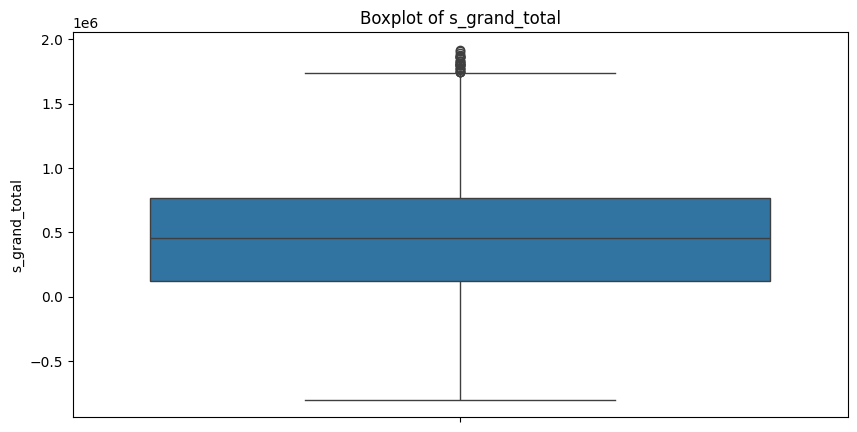

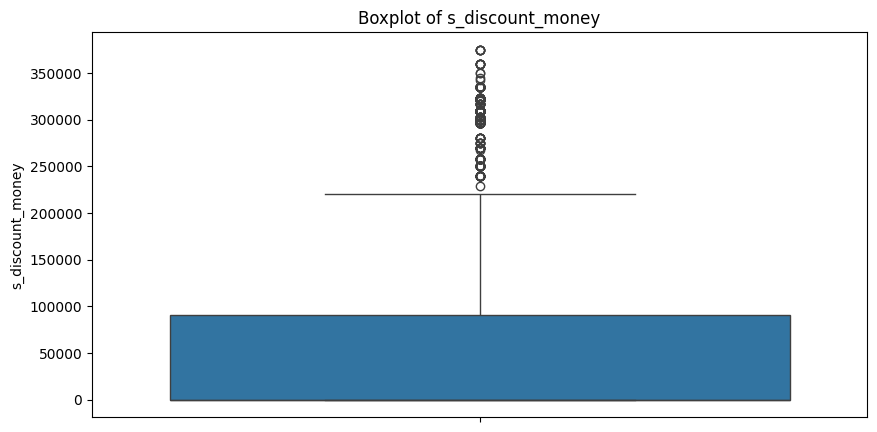

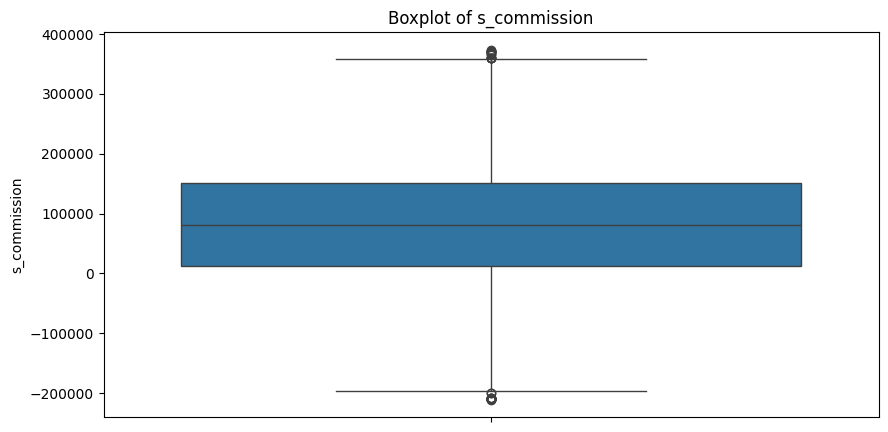

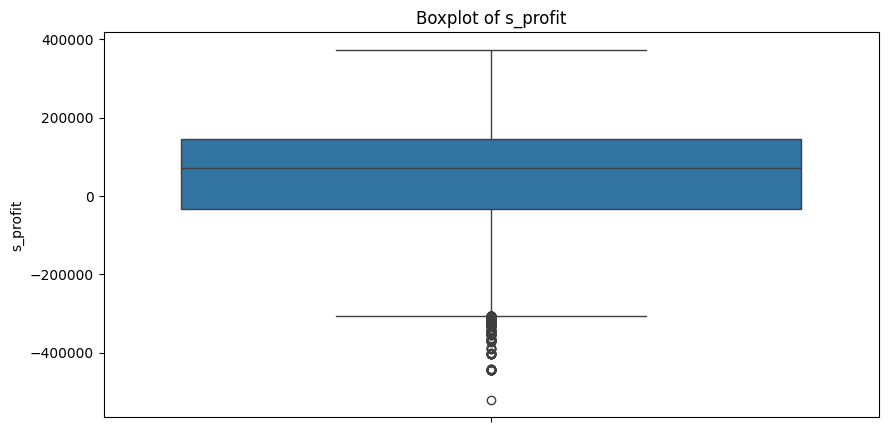

In [48]:
def print_stats(dataframe, column):
    print(f"Statistics for {column.upper()}:")
    print("Mean:", dataframe[column].mean())
    print("Median:", dataframe[column].median())
    print("Min:", dataframe[column].min())
    print("Max:", dataframe[column].max())
    print("Standard Deviation:", dataframe[column].std())
    print('\n')

def plot_box(dataframe, column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(dataframe[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

metrics = ['s_grand_total', 's_discount_money', 's_commission', 's_profit']

for metric in metrics:
    print_stats(data_bills, metric)

for metric in metrics:
    plot_box(data_bills, metric)


**`S_GRAND_TOTAL`:**
The statistics for `S_GRAND_TOTAL` remain relatively similar. The mean and median values of approximately 517,145 and 458,650, respectively, demonstrate a wide spread of transaction amounts, indicating a roughly symmetrical distribution with a slight possibility of right skew. The wide range between the minimum and maximum transaction values (from -800,000 to 1,920,000) points to a diverse array of transaction amounts, reflecting notable variability in transaction values as indicated by the standard deviation of 416,629.

**`S_DISCOUNT_MONEY`:**
The mean of approximately 72,109 and median of 0 still imply a significant right skew, indicating that most transactions do not include a discount, with some transactions featuring substantial discounts, as shown by a maximum discount of 375,000. The large standard deviation of 118,859 reinforces the presence of outliers with high discounts.

**`S_COMMISSION`:**
The mean commission of around 91,638 overshooting the median of 80,000 still suggests a moderate right skew. The occurrence of negative values as low as -210,830 highlights the presence of refunds or other adjustments. The standard deviation of 101,423 indicates a notable spread in commission values, reflecting various deal structures or anomalies.

**`S_PROFIT`:**
The mean profit remains approximately 20,371, which is substantially lower than the median of 72,000, potentially indicating a left skew or an unusual distribution of profit values. The range from -520,000 to 373,640, combined with a large standard deviation of 193,500, intimates considerable variability in profitability.

**Insight:**
The statistics highlight the need for a detailed examination of the transactional data, particularly for extreme values driving wide ranges and variability. It is crucial to investigate negative commission and profit values and scrutinize the high standard deviation values across these columns to gain a comprehensive understanding of transaction behaviors and to ensure accurate financial analysis and strategic planning.

                  s_grand_total  s_discount_money  s_commission  s_profit
s_grand_total          1.000000         -0.588754      0.878068  0.820289
s_discount_money      -0.588754          1.000000     -0.548451 -0.902023
s_commission           0.878068         -0.548451      1.000000  0.854184
s_profit               0.820289         -0.902023      0.854184  1.000000


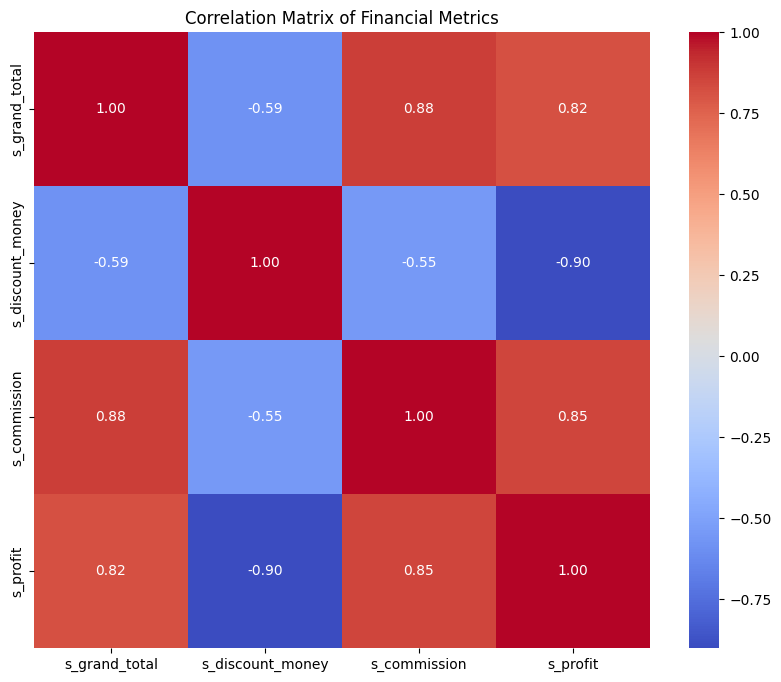

In [49]:
cols = ['s_grand_total', 's_discount_money', 's_commission', 's_profit']

correlation_matrix = data_bills[cols].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()

1. **`s_grand_total` and `s_profit`**:
   The correlation coefficient of 0.820289 continues to show a strong positive relationship. As grand total sales increase, profit tends to increase correspondingly, indicating a robust connection between sales and profitability.

2. **`s_grand_total` and `s_commission`**:
   The correlation of 0.878068 also indicates a strong positive link between total sales and commissions. Higher sales figures continue to be associated with higher commissions, reinforcing the existing understanding of their relationship.

3. **`s_grand_total` and `s_discount_money`**:
   The updated negative correlation of -0.588754 maintains a moderate inverse relationship. Transactions with higher total sales are still associated with fewer discounts, suggesting a continued strategy where larger sales are less reliant on discounts to attract buyers.

4. **`s_commission` and `s_profit`**:
   The correlation of 0.854184 still indicates a strong positive correlation. This relationship suggests that higher commissions continue to correlate with higher profits, reinforcing the idea that effective sales incentivization can drive profitability.

5. **`s_discount_money` and `s_profit`**:
   The correlation remains substantially negative at -0.902023, pointing to a strong inverse relationship. Higher discounts continue to be associated with a significant reduction in profits, reflecting the potential impact of decreased revenue per sale due to higher discounts.

6. **`s_discount_money` and `s_commission`**:
   The correlation of -0.548451 continues to suggest a moderate negative relationship, where higher discounts might be associated with lower commissions. This relationship highlights the impact of discounts on the base amount used for calculating commissions.


**Insight**:
The correlations provide insightful indicators for sales performance management. The direct positive relationships between `s_grand_total`, `s_commission`, and `s_profit` reinforce the importance of overall sales volume in driving commission-based incentives and profitability. The negative impacts of discounts on profit and commission highlight the delicate balance required in discount strategies. These quantitative insights should be complemented with qualitative business intelligence for strategic decisions in pricing, sales, and marketing to ensure they align with broader business goals. Care should be taken to avoid confusing correlation with causation; further analysis is necessary to identify the driving forces behind these correlations.

In [50]:
merged_data = data_bills.merge(
    data_occasions, left_on='to_user_occasion_id', right_on='occasion_id', how='left'
).merge(
    data_relationships, left_on='to_user_relationship_id', right_on='relationship_id', how='left'
)

merged_data['month'] = merged_data['to_user_date'].dt.month

analysis = merged_data.groupby(['occasion_name', 'relationship_name', 'month']).size().reset_index(name='gift_count')

/var/folders/88/l6n2p6zj7k511lqxlc10jcvh0000gn/T/ipykernel_4176/171853444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='occasion_name', y='gift_count', data=gifts_by_occasion, palette='tab10')


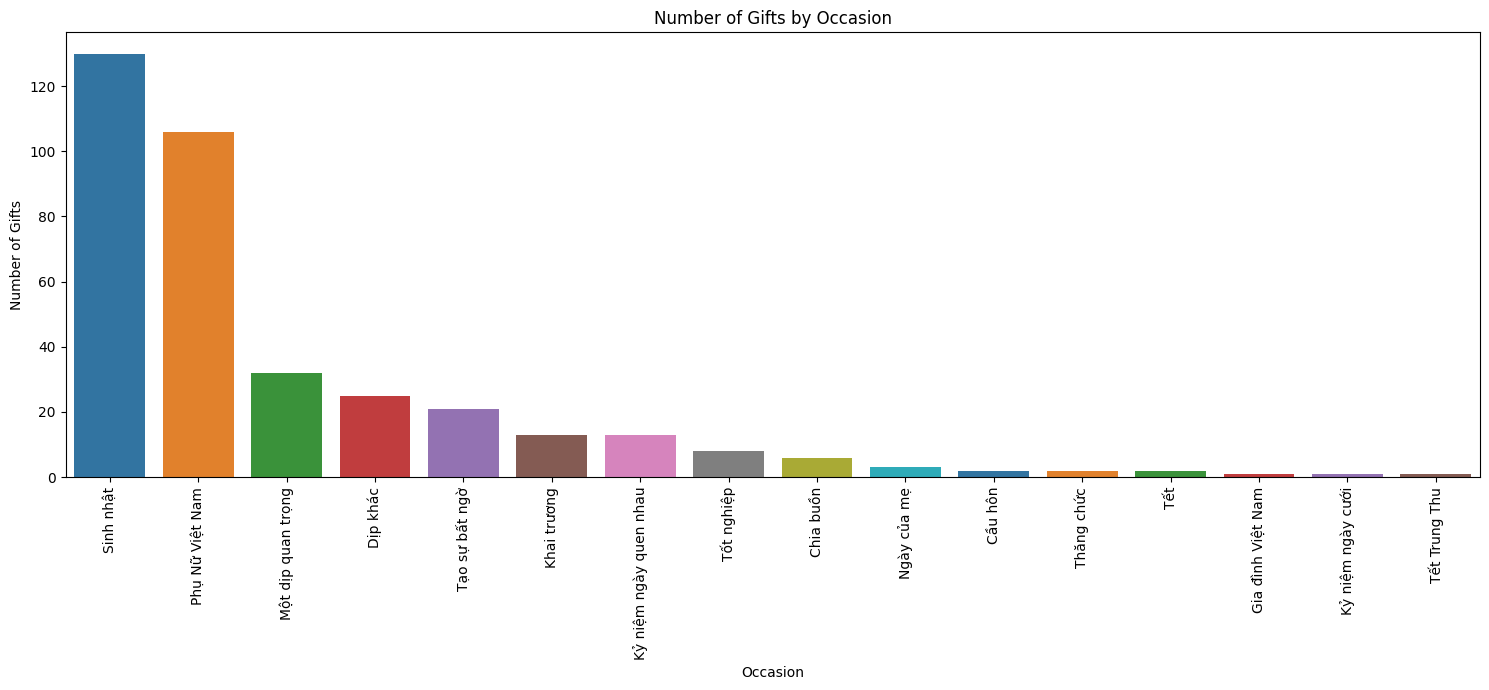

In [51]:
gifts_by_occasion = analysis.groupby('occasion_name')['gift_count'].sum().reset_index()
gifts_by_occasion = gifts_by_occasion.sort_values('gift_count', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='occasion_name', y='gift_count', data=gifts_by_occasion, palette='tab10')
plt.xticks(rotation=90) 
plt.title('Number of Gifts by Occasion')
plt.xlabel('Occasion')
plt.ylabel('Number of Gifts')
plt.tight_layout() 
plt.show()

/var/folders/88/l6n2p6zj7k511lqxlc10jcvh0000gn/T/ipykernel_4176/3364681679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='relationship_name', y='gift_count', data=gifts_by_relationship, palette='tab10')


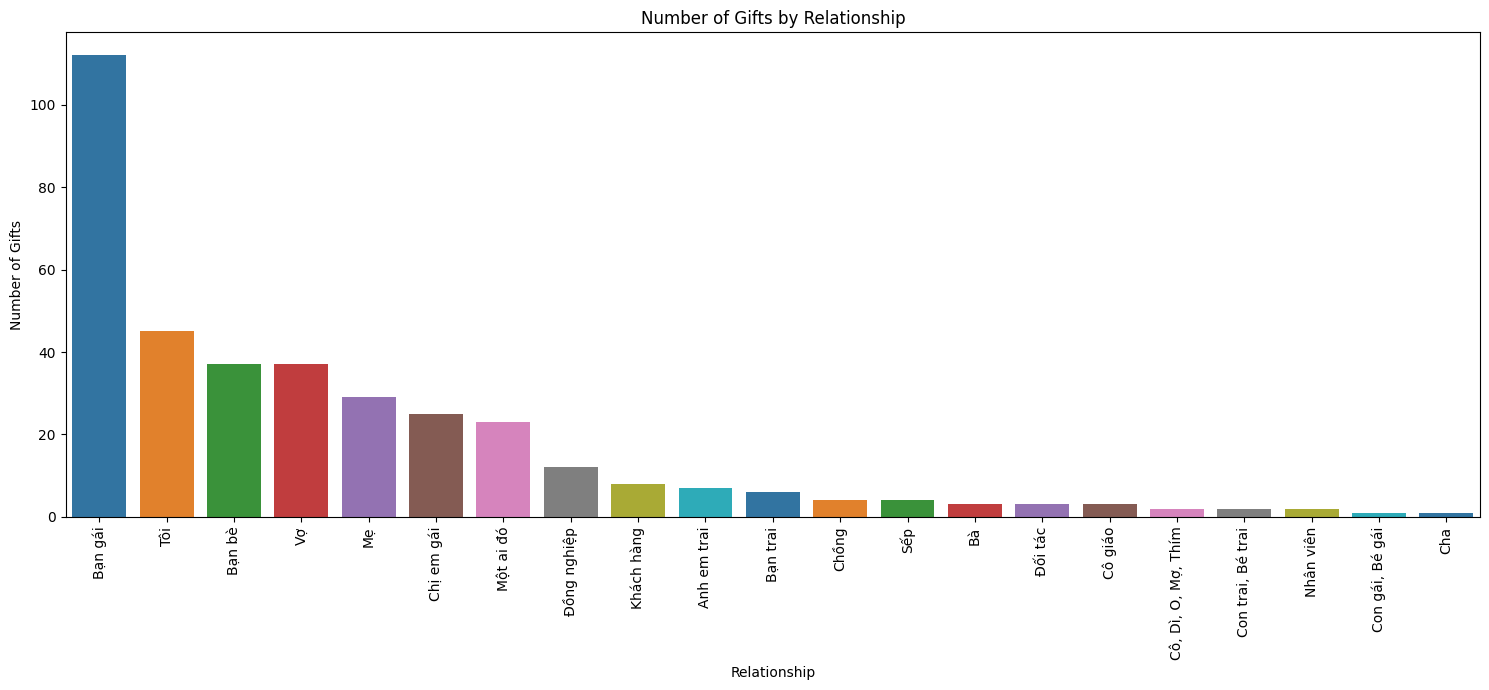

In [52]:
gifts_by_relationship = analysis.groupby('relationship_name')['gift_count'].sum().reset_index()
gifts_by_relationship = gifts_by_relationship.sort_values('gift_count', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='relationship_name', y='gift_count', data=gifts_by_relationship, palette='tab10')
plt.xticks(rotation=90)
plt.title('Number of Gifts by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Number of Gifts')
plt.tight_layout() 
plt.show()

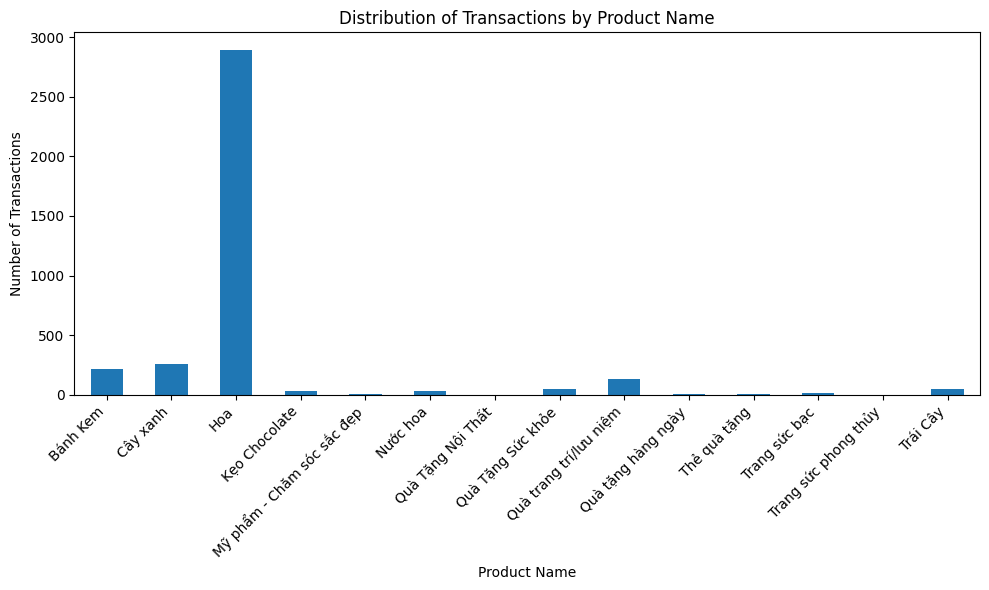

In [53]:
merged_data = pd.merge(data_bills, data_products, on='product_id', how='left')

grouped_product_transactions = merged_data.groupby('product_name').size()

plt.figure(figsize=(10, 6))
grouped_product_transactions.plot(kind='bar')
plt.title('Distribution of Transactions by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

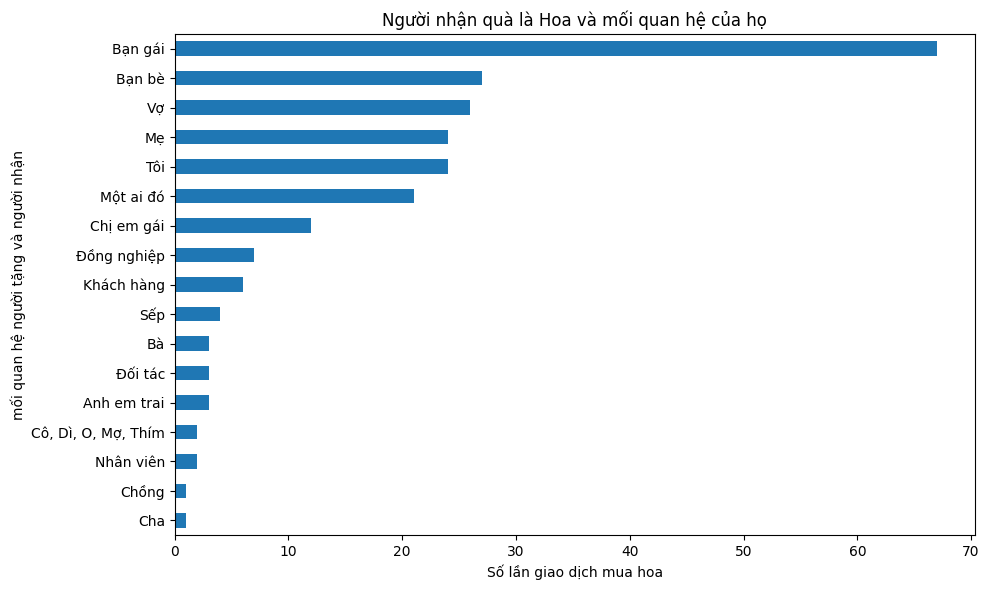

In [54]:
flowers_transactions = merged_data[merged_data['product_name'] == 'Hoa']

flowers_with_relationships = pd.merge(flowers_transactions, data_relationships, left_on='to_user_relationship_id', right_on='relationship_id', how='left')

grouped_relationship_trans = flowers_with_relationships.groupby('relationship_name').size()

grouped_relationship_trans_sorted = grouped_relationship_trans.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
grouped_relationship_trans_sorted.plot(kind='barh')  
plt.title('Người nhận quà là Hoa và mối quan hệ của họ')
plt.xlabel('Số lần giao dịch mua hoa')
plt.ylabel('mối quan hệ người tặng và người nhận')
plt.tight_layout()  
plt.gca().invert_yaxis()
plt.show()

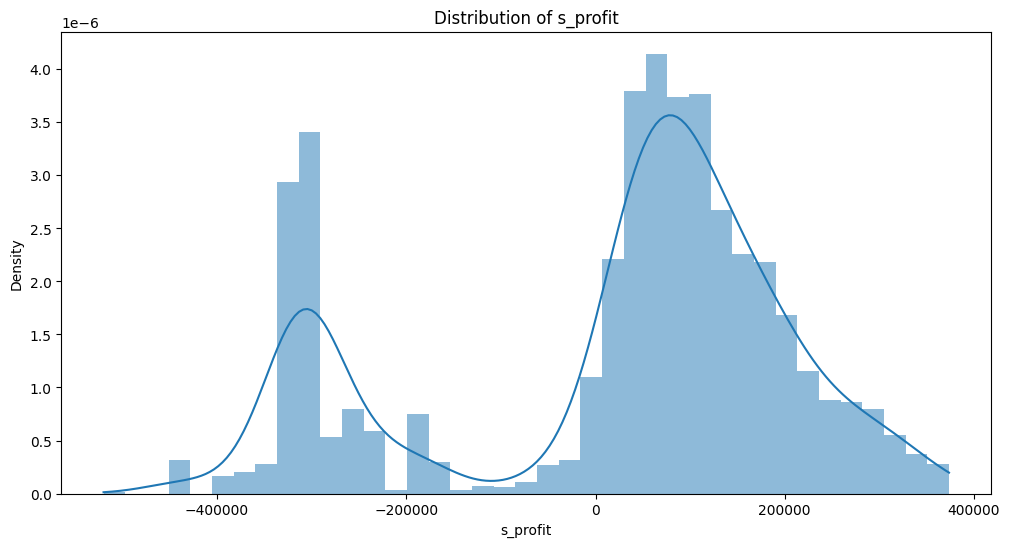

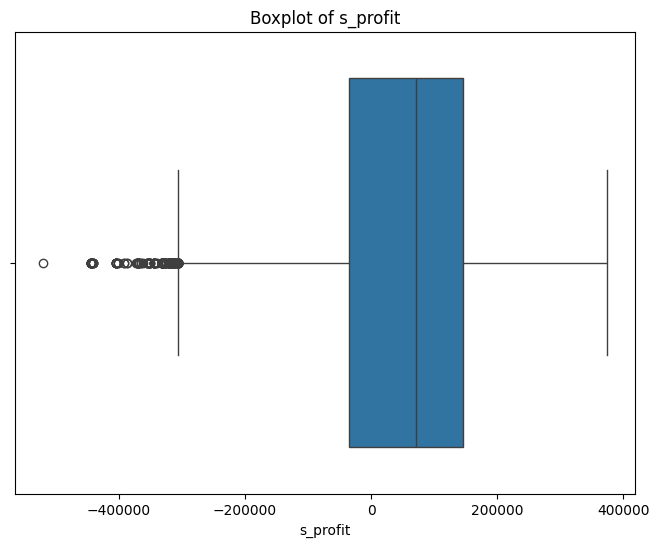

In [55]:
# df for testing
df = data_bills.copy()
plt.figure(figsize=(12, 6))
sns.histplot(df['s_profit'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of s_profit')
plt.xlabel('s_profit')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['s_profit'])
plt.title('Boxplot of s_profit')
plt.xlabel('s_profit')
plt.show()

In [56]:
data_bills.sort_values('create_info_created', inplace=True)

/var/folders/88/l6n2p6zj7k511lqxlc10jcvh0000gn/T/ipykernel_4176/3406076999.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_bills['s_profit_rolling'] = filtered_data_bills['s_profit'].rolling(window=30).mean()


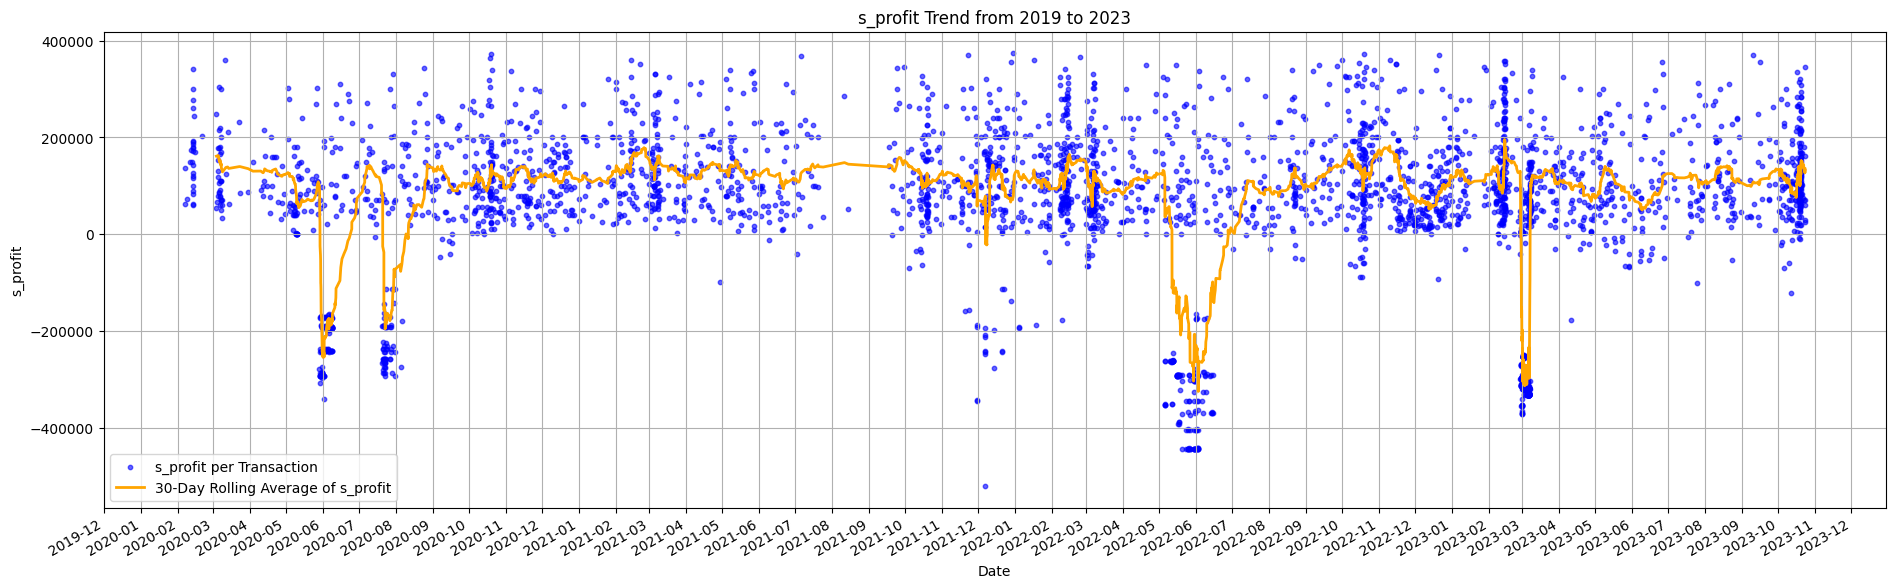

In [57]:
plt.figure(figsize=(23, 7))

start_date = pd.Timestamp('2020-01-01', tz='UTC')

# có 1 data point bị lạc nên bỏ luôn
filtered_data_bills = data_bills[data_bills['create_info_created'] > start_date]

plt.scatter(filtered_data_bills['create_info_created'], filtered_data_bills['s_profit'], 
            alpha=0.6, label='s_profit per Transaction', color='blue', s=10)

filtered_data_bills['s_profit_rolling'] = filtered_data_bills['s_profit'].rolling(window=30).mean()

plt.plot(filtered_data_bills['create_info_created'], filtered_data_bills['s_profit_rolling'], 
         label='30-Day Rolling Average of s_profit', color='orange', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

plt.gcf().autofmt_xdate()

plt.title('s_profit Trend from 2019 to 2023')
plt.xlabel('Date')
plt.ylabel('s_profit')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# visualize using Google Bigquery
data_bills.to_csv("for_bq.csv")

## 4. Dive deep into Analytics

1. **Phân tích Cohort**:
   - Sử dụng `create_info_created` để xác định lần mua đầu tiên của khách hàng và tạo các cohort dựa trên thời gian.
   - Phân tích để xác định tỷ lệ khách hàng quay lại mua hàng trong mỗi cohort.

2. **Phân tích K-means Clustering**:
   - Tạo các cluster khách hàng dựa trên các đặc điểm như tần suất mua hàng, mức độ chi tiêu, và các biến số khác. Điều này giúp nhận biết các nhóm khách hàng có xu hướng mua sắm tương tự nhau.
   - Phân tích các cluster để xác định mẫu hành vi tái mua và nhu cầu liên quan đến sản phẩm hoặc dịch vụ.

3. **Sequential Pattern Mining**:
   - Sử dụng thuật toán như PrefixSpan để tìm ra các chuỗi mua hàng phổ biến - sản phẩm nào thường được mua sau sản phẩm nào, hoặc sự tiêu dùng dịch vụ theo thời gian.
   - thông qua `product_id` và `to_user_date`, ta có thể tìm ra các mô hình mua sắm liên tục qua thời gian.

4. **Survival Analysis**:
   - Áp dụng phương pháp survival analysis để đánh giá khoảng thời gian giữa các lần mua sắm. Điều này giúp hiểu được sau bao lâu khách hàng có xu hướng quay trở lại sau mỗi lần mua.
   - Thông qua khoảng cách thời gian giữa các lần `create_info_created`, bạn có thể tiên lượng thời gian "sống" của mối quan hệ khách hàng (tính đến lần mua tiếp theo).
  
  
5. **RFM Analysis (Recency, Frequency, Monetary)**:
   - Tính `Recency` bằng cách xác định thời gian kể từ lần mua hàng gần nhất (sử dụng `to_user_date` hoặc `create_info_created`).
   - Xác định `Frequency` bằng cách đếm số lần mùa hàng của mỗi `customer_id`.
   - Tính `Monetary` dựa vào tổng chi tiêu (`s_grand_total`) hoặc lợi nhuận (`s_profit` hoặc `s_profit_in_USD`) để xem xét giá trị đóng góp của khách hàng.

### 4.1. Phân tích Cohort:

In [59]:
data_bills_deep_analytics = data_bills.copy()

In [60]:
start_date = pd.to_datetime('2020-01-01').tz_localize('UTC')
data_bills_deep_analytics = data_bills[data_bills['create_info_created'] >= start_date]

In [61]:
data_1 = data_bills_deep_analytics.copy()

In [62]:
data_1['create_info_created'] = pd.to_datetime(data_1['create_info_created'])

first_purchase = data_1.groupby('customer_id')['create_info_created'].min().reset_index()
first_purchase.columns = ['customer_id', 'FirstPurchaseDate']

first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')

data_1 = pd.merge(data_1, first_purchase, on='customer_id', how='left')
data_1['OrderPeriod'] = data_1['create_info_created'].dt.to_period('M')

cohort_data = data_1.groupby(['FirstPurchaseMonth', 'OrderPeriod']).agg(n_customers=('customer_id', 'nunique')).reset_index()

cohort_data['PeriodNumber'] = (cohort_data['OrderPeriod'] - cohort_data['FirstPurchaseMonth']).apply(attrgetter('n'))

cohort_counts = cohort_data.pivot_table(index='FirstPurchaseMonth', columns='PeriodNumber', values='n_customers')

print(cohort_counts)

PeriodNumber           0     1    2    3    4    5    6    7    8    9   ...  \
FirstPurchaseMonth                                                       ...   
2020-02              28.0   1.0  1.0  3.0  1.0  2.0  1.0  1.0  2.0  1.0  ...   
2020-03              38.0   NaN  NaN  NaN  NaN  NaN  1.0  3.0  1.0  NaN  ...   
2020-04              21.0   NaN  NaN  3.0  NaN  NaN  2.0  1.0  NaN  NaN  ...   
2020-05              99.0   1.0  4.0  2.0  4.0  3.0  1.0  2.0  1.0  1.0  ...   
2020-06             100.0   3.0  1.0  1.0  3.0  2.0  1.0  NaN  2.0  3.0  ...   
2020-07              80.0   4.0  2.0  4.0  NaN  NaN  NaN  1.0  1.0  NaN  ...   
2020-08              26.0   NaN  2.0  1.0  2.0  2.0  2.0  2.0  2.0  1.0  ...   
2020-09              33.0   1.0  3.0  3.0  NaN  2.0  1.0  1.0  1.0  NaN  ...   
2020-10              78.0   4.0  2.0  2.0  3.0  6.0  1.0  2.0  2.0  1.0  ...   
2020-11              46.0   1.0  3.0  5.0  1.0  1.0  1.0  NaN  1.0  NaN  ...   
2020-12              34.0   NaN  3.0  2.

/var/folders/88/l6n2p6zj7k511lqxlc10jcvh0000gn/T/ipykernel_4176/788360346.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')
/var/folders/88/l6n2p6zj7k511lqxlc10jcvh0000gn/T/ipykernel_4176/788360346.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_1['OrderPeriod'] = data_1['create_info_created'].dt.to_period('M')


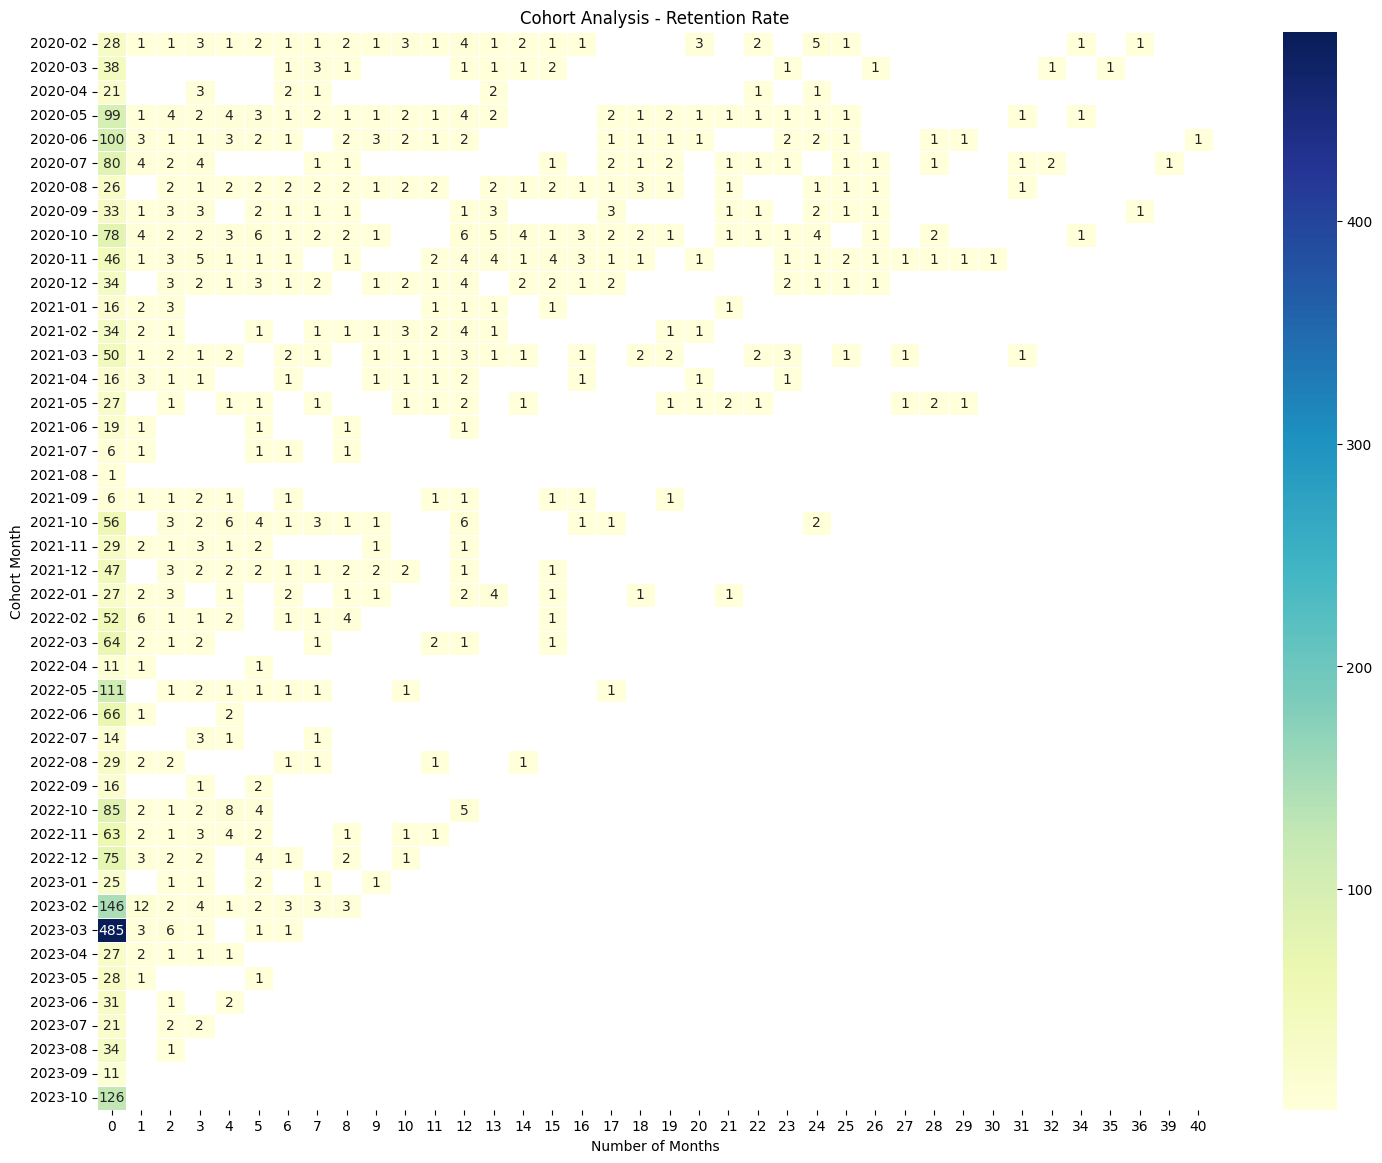

In [63]:
plt.figure(figsize=(18, 14))
sns.heatmap(cohort_counts, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Cohort Analysis - Retention Rate')
plt.ylabel('Cohort Month')
plt.xlabel('Number of Months')
plt.show()

<img src="overview2.jpg"/> 

Các giá trị và màu sắc trên biểu đồ heatmap phân tích Cohort cho ta thông tin về tỷ lệ giữ chân khách hàng cùng với các metric tài chính nhất định. Kết hợp với đồ thị tôi làm từ PowerBI để thấy rõ hơn bối cảnh toàn cục, ta chọn điểm dữ liệu tại x = 0 và y = 2023-03 dễ được thấy, sau đây là một số phân tích:

1. **Giá trị 485 và màu rất đậm:** Cho thấy rằng gấp 4.85 gần 5 lần số khách hàng từ nhóm bắt đầu vào tháng 3 năm 2023 đã mua hàng hoặc tương tác lại trong cùng tháng (x = 0, tức tháng khởi đầu), và một số lượng lớn khách hàng thực hiện hành động mua hàng biểu hiện qua màu sắc đậm, cho biết tỷ lệ giữ chân lớn.

2. **Discount cao và phát voucher free quà:** Đây có thể là chiến dịch marketing nhằm thu hút khách hàng mới hoặc khuyến khích khách hàng hiện tại mua sắm nhiều hơn. Mặc dù chiến lược này thành công trong việc tạo ra doanh số (số lượng hóa đơn tăng), nhưng nó cũng dẫn đến chi phí lớn hơn do giảm giá và phát quà.

3. **Revenue cao (s_grand_total):** Doanh thu cao chỉ ra rằng tổng giá trị của các giao dịch là lớn, nhưng điều này không nhất thiết phản ánh lợi nhuận ròng, bởi vì doanh thu không tính đến chi phí liên quan.

4. **Lợi nhuận âm (s_profit):** Điều này có nghĩa là tổng chi phí, bao gồm chiết khấu và phát quà, đã vượt quá doanh thu thu được. Kết quả là, mặc dù có sức mua cao và tỷ lệ giữ chân tốt, chiến lược giảm giá quá mức đã làm tiêu hao lợi nhuận ròng.

Tình huống này yêu cầu một sự đánh giá chi tiết về chiến lược giá và khuyến mãi. Doanh nghiệp cần cân nhắc giữa việc thu hút và giữ chân khách hàng so với việc duy trì một lợi nhuận khả quan để bảo đảm sự phát triển bền vững.

### 4.2. Phân tích K-means Clustering:

Prepare -> Scale -> Cluster Optimization -> Fit model & Visualization

In [64]:
data_2 = data_bills_deep_analytics.copy()

In [65]:
start_date = pd.to_datetime('2020-01-01').tz_localize('UTC')

data_2 = data_bills[data_bills['create_info_created'] >= start_date]

In [66]:
# Tính tần suất mua hàng cho mỗi khách hàng
frequency = data_2.groupby('customer_id').size().reset_index(name='frequency')

# Tính tổng số tiền chi tiêu cho mỗi khách hàng
total_spent = data_2.groupby('customer_id')['s_grand_total'].sum().reset_index()

# Tính tổng số tiền giảm giá cho mỗi khách hàng
total_discount = data_2.groupby('customer_id')['s_discount_money'].sum().reset_index()

# Gộp các khoản tính toán để tạo dataframe mới cho các features
customer_features = frequency.merge(total_spent, on='customer_id').merge(total_discount, on='customer_id')

# Loại bỏ khách hàng ID từ features trước khi điều chỉnh mô hình
X = customer_features.drop('customer_id', axis=1)

In [67]:
X.head(3)

,frequency,s_grand_total,s_discount_money
0,13,11460000.0,0.0
1,1,483000.0,7000.0
2,1,514000.0,0.0


In [68]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

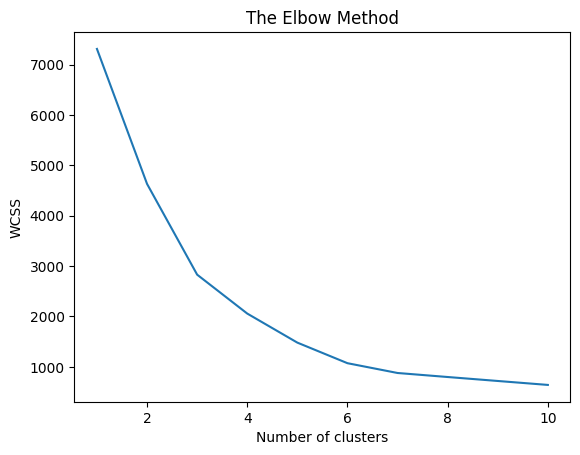

In [69]:
# test theo pp Elbow
wcss = []  # Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

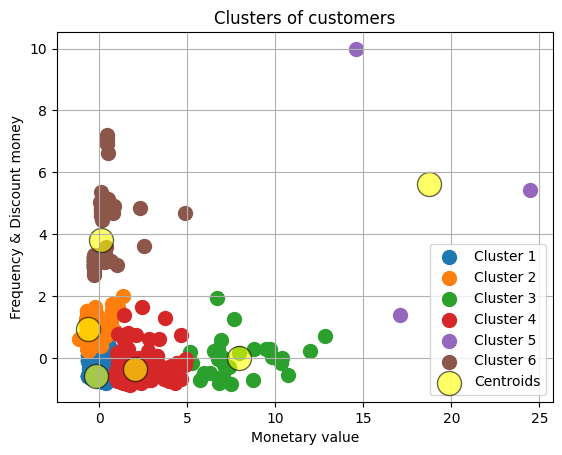

In [70]:
def plot_clusters(X, kmeans, n_clusters):
    # reduce dimensions for better visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # data points and marked cluster_id
    for cluster_id in range(n_clusters):
        plt.scatter(
            X_pca[kmeans.labels_ == cluster_id, 0], 
            X_pca[kmeans.labels_ == cluster_id, 1], 
            s=100, 
            label=f'Cluster {cluster_id+1}'
        )

    centroids = pca.transform(kmeans.cluster_centers_)
    plt.scatter(
        centroids[:, 0], 
        centroids[:, 1], 
        s=300, 
        c='yellow', 
        label='Centroids', 
        alpha=0.6, 
        edgecolors='black'
    )
    
    plt.title('Clusters of customers')
    plt.xlabel('Monetary value')
    plt.ylabel('Frequency & Discount money')
    plt.legend()
    plt.grid(True)
    plt.show()

n_clusters_chosen = 6
kmeans = KMeans(n_clusters=n_clusters_chosen, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

plot_clusters(X_scaled, kmeans, n_clusters_chosen)

In [71]:
def print_cluster_centers(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    
    centroids = kmeans.cluster_centers_

    for i, center in enumerate(centroids):
        print(f"Centroid của cluster {i + 1}: {center}")

print_cluster_centers(X_scaled, n_clusters=n_clusters_chosen)

Centroid của cluster 1: [-0.21107735 -0.05835685 -0.57674896]
Centroid của cluster 2: [-0.26825974 -0.56221066  0.91893662]
Centroid của cluster 3: [ 5.32769857  5.93734024 -0.1440809 ]
Centroid của cluster 4: [ 1.27915013  1.59397739 -0.39300958]
Centroid của cluster 5: [15.97849522 10.70529364  4.2430963 ]
Centroid của cluster 6: [ 0.71210084 -0.39082008  3.72319586]


/Users/thailinhpham/anaconda3/envs/t1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dựa trên biểu đồ phân nhóm, những gợi ý sau có thể giúp cải thiện việc thu hút và giữ chân khách hàng:

1. **Cluster 1 - Thấp ở tất cả các khía cạnh:**
   - **Kích thích Tần Suất:** Phát triển chương trình khách hàng thân thiết, cung cấp quyền lợi cho khách hàng theo số lần mua hàng.
   - **Marketing Targeted:** Tập trung vào việc nhắm đến loại khách hàng này với thông tin sản phẩm và khuyến mãi hấp dẫn để thúc đẩy họ chi tiêu nhiều hơn.

2. **Cluster 2 - Tần suất mua hàng cao nhưng tiền chi tiêu và chiết khấu thấp:**
   - **Chăm sóc Khách Hàng Đặc Biệt:** Khảo sát nhóm này để hiểu rõ hơn về nhu cầu và cung cấp các dịch vụ hoặc sản phẩm phù hợp hơn.
   - **Đánh giá Chính Sách Giảm Giá:** Nghiên cứu liệu có cần thiết phải tăng mức chiết khấu để khuyến khích họ chi tiêu nhiều hơn nữa hay không.

3. **Cluster 3 - Tiêu dùng và ưu đãi cả hai đều cao:**
   - **Tối ưu Chiết Khấu:** Xem xét lại các chương trình ưu đãi để đảm bảo rằng chúng không ảnh hưởng tiêu cực đến lợi nhuận.
   - **Tăng Cường Trung Thành:** Xây dựng chương trình trung thành mạnh mẽ để giữ chân khách hàng mà không phải dựa hoàn toàn vào chiết khấu.

4. **Cluster 4 - Tiêu dùng và tần suất mua hàng thấp, chiết khấu vừa phải:**
   - **Chủ Động Marketing:** Phát triển các chiến dịch nhằm tăng tần suất mua hàng và nâng cao giá trị đơn hàng.
   - **Phân tích Đối Tượng:** Hiểu rõ hơn về lý do của việc tiêu dùng thấp, có thể thông qua khảo sát hoặc phân tích dữ liệu mua hàng.

5. **Cluster 5 - Mọi chỉ số đều rất cao:**
   - **Quản Lý Chiết Khấu:** Kiểm tra và quản lý chiết khấu để tránh gây tổn hại tới lợi nhuận tổng thể.
   - **Phân tích Chất Lượng Khách Hàng:** Đảm bảo rằng khách hàng không lạm dụng các chương trình ưu đãi.

6. **Cluster 6 - Tiêu dùng và chiết khấu cao, tần suất mua hàng vừa phải:**
   - **Cá nhân Hóa Ưu Đãi:** Cung cấp giảm giá và ưu đãi dựa trên hành vi mua sắm cụ thể của khách hàng để thúc đẩy sự trung thành.
   - **Phân tích Sở Thích:** Sử dụng dữ liệu để hiểu rõ sở thích mua sắm và cung cấp sản phẩm hoặc dịch vụ phù hợp với những sở thích đó.

Đối với mỗi cluster, việc hiểu rõ khách hàng và thiết kế các chương trình marketing cũng như chăm sóc khách hàng có mục tiêu và cá nhân hóa sẽ là chìa khóa để tăng cả sự trung thành và lợi nhuận. Kết hợp data analysis với feedback từ khách hàng để thông tin cho chiến lược cá nhân hóa có thể giúp công ty phân phối ngân sách và nguồn lực một cách đắc lực nhất.

### 4.3. Survival Analysis:

Áp dụng phương pháp survival analysis để đánh giá khoảng thời gian giữa các lần mua sắm. Điều này giúp hiểu được sau bao lâu khách hàng có xu hướng quay trở lại sau mỗi lần mua.
Thông qua khoảng cách thời gian giữa các lần create_info_created, bạn có thể tiên lượng thời gian "sống" của mối quan hệ khách hàng (tính đến lần mua tiếp theo).

In [72]:
data_3 = data_bills_deep_analytics.copy()

In [73]:
data_3 = data_3.sort_values(['customer_id', 'create_info_created'])
data_3['create_info_created'] = pd.to_datetime(data_3['create_info_created'])

# Tạo cột 'next_purchase' thể hiện thời gian cho lần mua tiếp theo
data_3['next_purchase'] = data_3.groupby('customer_id')['create_info_created'].shift(-1)

# Tính 'duration' là khoảng thời gian giữa lần mua này và lần mua tiếp theo
data_3['duration'] = (data_3['next_purchase'] - data_3['create_info_created']).dt.days

# Tạo cột 'event_observed' mà trong đó 1 nếu có lần mua tiếp theo, còn lại là 0
data_3['event_observed'] = 1
data_3['event_observed'] = data_3['event_observed'].where(data_3['next_purchase'].notnull(), 0)

<Axes: xlabel='timeline'>

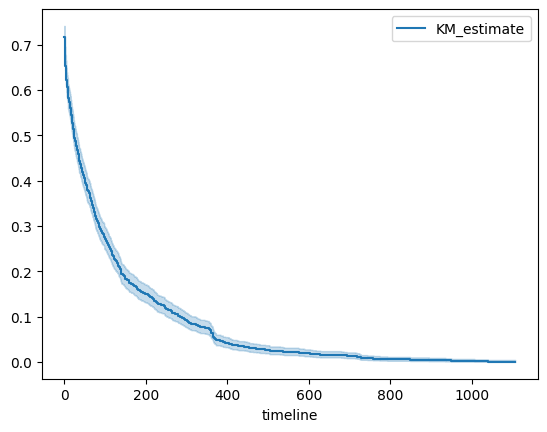

In [74]:
data_for_survival = data_3[['_id', 'create_info_created', 'next_purchase', 'duration', 'event_observed']].copy()

# Loại bỏ các dòng có giá trị NaN trong cột 'duration' hoặc 'next_purchase'
data_for_survival.dropna(subset=['duration', 'next_purchase'], inplace=True)

from lifelines import KaplanMeierFitter

# KaplanMeierFitter
kmf = KaplanMeierFitter()
T = data_for_survival['duration']
E = data_for_survival['event_observed']

kmf.fit(T, event_observed=E)

kmf.plot_survival_function()

Phân tích biểu đồ survival:

1. **Giai đoạn đầu (0 - 200 ngày):** Tỷ lệ survival giảm rất nhanh từ 0,7 xuống còn 0,15, cho thấy sau khi khách hàng mua hàng lần đầu, sự giữ chân khách hàng và tái mua hàng giảm xuống mạnh mẽ. Điều này có thể liên quan đến:
    - Sự hài lòng của khách hàng sau mua hàng đầu tiên không cao.
    - Không có đủ chương trình khách hàng thân thiết để khuyến khích họ quay lại.
    - Sản phẩm hoặc dịch vụ có thể không đáp ứng được kỳ vọng, hoặc không cạnh tranh được so với thị trường.

2. **Giai đoạn trung gian (200 - 600 ngày):** Tỷ lệ này tiếp tục giảm nhưng với tốc độ chậm hơn, điều này cho thấy những khách hàng còn lại sau giai đoạn đầu có xu hướng trung thành tốt hơn, nhưng tỷ lệ giữ chân vẫn tiếp tục giảm. Có thể đây là nhóm khách hàng hài lòng nhưng cần thêm động lực để tái mua.

3. **Giai đoạn dài hạn (600 ngày trở lên):** Tỷ lệ survival tựa như tiệm cận đến mức 0,03 và giữ vững ở đấy khi đi qua 1000 ngày, cho thấy một nhóm rất nhỏ khách hàng vẫn còn trung thành sau một thời gian dài. Đây có thể là các khách hàng gắn bó, hoặc những người hưởng lợi từ các dịch vụ/ sản phẩm không thể so sánh được.

Dựa trên thông tin này, công ty cần tập trung vào việc cải thiện trải nghiệm khách hàng ngay từ giao dịch đầu tiên để giảm tốc độ suy giảm của tỷ lệ survival trong giai đoạn đầu, đồng thời xây dựng các chương trình nhằm tăng cường sự gắn bó và công nhận đối với khách hàng trung thành. Một số chiến lược có thể bao gồm:

- Cải thiện chất lượng sản phẩm/dịch vụ để đạt kỳ vọng khách hàng ngay từ lần mua hàng đầu tiên.
- Tiến hành khảo sát hiệu chỉnh để hiểu rõ lý do khiến họ không quay lại mua sắm.
- Xây dựng chương trình loại bỏ những rào cản tái mua thông qua ưu đãi, chương trình tích điểm, hoặc thành viên VIP.
- Cung cấp quảng bá, hỗ trợ, và chăm sóc sau bán hàng để duy trì mối quan hệ với khách hàng sau giao dịch đầu tiên.
- Phát triển chiến lược nội dung và tiếp thị để tạo dựng một cộng đồng khách hàng gắn kết và trung thành.

### 4.4. Sequential Pattern Mining:

Sử dụng thuật toán như PrefixSpan để tìm ra các chuỗi mua hàng phổ biến - sản phẩm nào thường được mua sau sản phẩm nào, hoặc sự tiêu dùng dịch vụ theo thời gian.
thông qua product_id và to_user_date, ta có thể tìm ra các mô hình mua sắm liên tục qua thời gian.

In [75]:
data_4 = data_bills_deep_analytics.copy()

In [76]:
data_4.head(1)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created,to_province,s_profit,s_profit_in_USD
179,5e3bf200f80636dc108b4569,5e3bf1fff80636dc108b4567,6066c157066c9a03055f2b10,VN,345000.0,0.0,63000.0,5016fd6b7f8b9ac842000000,NaN,NaN,62bc673e56bcb11219004f30,2020-02-07 04:00:00+00:00,2020-02-06 11:01:19.401000+00:00,TP Hồ Chí Minh,63000.0,2.611615


In [77]:
merged_data = pd.merge(data_4, data_products, on='product_id', how='left')

# sx dữ liệu theo 'customer_id' và 'to_user_date'
merged_data_sorted = merged_data.sort_values(by=['customer_id', 'to_user_date'])

transactions_with_names = merged_data_sorted.groupby('customer_id')['product_name'].apply(list)

sequences_with_names = transactions_with_names.tolist()

# Sequential Pattern Mining với PrefixSpan
ps = PrefixSpan(sequences_with_names)

# Tìm common patterns với minimum support
patterns_with_names = ps.frequent(2)  # Ví dụ: đặt minimum support là 2

# In ra các mẫu tìm được
for pattern in patterns_with_names:
    print(pattern)


(1960, ['Hoa'])
(438, ['Hoa', 'Hoa'])
(177, ['Hoa', 'Hoa', 'Hoa'])
(101, ['Hoa', 'Hoa', 'Hoa', 'Hoa'])
(67, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(46, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(29, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(19, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(12, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(10, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(9, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(7, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(6, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(4, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(3, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa'])
(2, ['Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', 'Hoa', '

In [78]:
# !pip install networkx

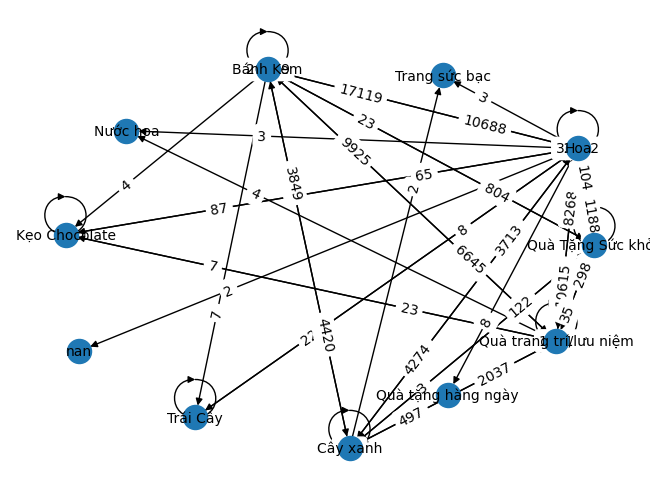

In [79]:
# Vẽ network graph
G = nx.DiGraph()

# Đảm bảo rằng mỗi cạnh được thêm vào có weight là số lần xuất hiện của mẫu
for support, items in patterns_with_names:
    for i in range(len(items)-1):
        # Check xem cạnh đã có trong graph hay chưa để cộng dồn support
        if G.has_edge(items[i], items[i+1]):
            # Tăng weight (support) của cạnh nếu nó đã tồn tại
            G[items[i]][items[i+1]]['weight'] += support
        else:
            # Tạo cạnh mới với weight bằng support nếu nó chưa tồn tại
            G.add_edge(items[i], items[i+1], weight=support)

pos = nx.spring_layout(G, k=200) # có thể tăng giá trị 'k' để tăng khoảng cách

node_size = 300
font_size = 10
nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=font_size)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3) # Thử điều chỉnh label_pos để thay đổi vị trí nhãn cạnh

plt.show()

      Support                         Pattern  Length
0        1960                           [Hoa]       1
1         438                      [Hoa, Hoa]       2
7898      237                      [Cây xanh]       1
2         177                 [Hoa, Hoa, Hoa]       3
8254      157                      [Bánh Kem]       1
6728      106        [Quà trang trí/lưu niệm]       1
3         101            [Hoa, Hoa, Hoa, Hoa]       4
4          67       [Hoa, Hoa, Hoa, Hoa, Hoa]       5
4823       49                 [Hoa, Bánh Kem]       2
5          46  [Hoa, Hoa, Hoa, Hoa, Hoa, Hoa]       6


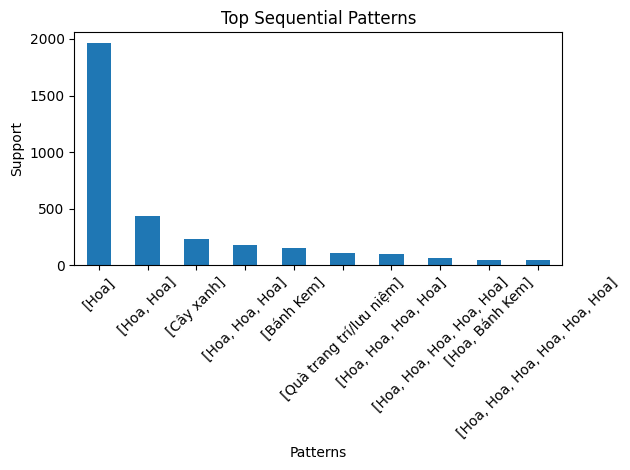

In [80]:
patterns_df = pd.DataFrame(patterns_with_names, columns=['Support', 'Pattern'])
patterns_df['Length'] = patterns_df['Pattern'].apply(len)  # add cột Length vào dataframe

print(patterns_df.sort_values(by='Support', ascending=False).head(10))  

# Visualize: ví dụ dùng bar plot cho support
patterns_df.sort_values(by='Support', ascending=False).head(10).plot(
    x='Pattern', 
    y='Support', 
    kind='bar', 
    legend=None,
    title='Top Sequential Patterns'
)
plt.xlabel('Patterns')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

Kết quả từ sequential pattern mining phản ánh một số thông tin chính về xu hướng mua sắm và hành vi của khách hàng tại MyCompany:

1. **Sản phẩm "Hoa" rất phổ biến**: Điều này được chứng minh bởi việc "Hoa" xuất hiện không chỉ ở các mẫu đơn lẻ với support cao nhất mà còn ở nhiều kết hợp chuỗi khác nhau và có sự lặp lại. Điều này cho thấy khách hàng không chỉ mua "Hoa" một lần mà còn mua lặp lại nhiều lần.

2. **Có sự gia tăng tỷ lệ mua hàng liên tiếp**: Các patterns với độ dài từ 2-6 phần (ví dụ: "Hoa, Hoa", "Hoa, Hoa, Hoa", ... đến "Hoa, Hoa, Hoa, Hoa, Hoa, Hoa") có tỷ lệ support giảm dần theo độ dài của chuỗi, nhưng vẫn đủ đáng kể để lưu ý. Mọi người đã không chỉ mua hoa một lần mà còn mua lặp đi lặp lại theo thời gian, điều này là dấu hiệu của sự trung thành và thói quen mua sắm.

3. **Các sản phẩm khác như "Cây xanh" và "Bánh Kem" cũng có mức độ phổ biến nhất định**, nhưng không cao bằng "Hoa". Điều này có thể phản ánh một thị hiếu hoặc nhu cầu phụ, hoặc các sản phẩm mùa vụ/tùy từng dịp.

4. **Có sự kết hợp giữa "Hoa" và "Bánh Kem"**: Mặc dù ít phổ biến hơn các patterns chỉ có "Hoa", sự kết hợp này có thể phản ánh một xu hướng tặng quà kết hợp, như hoa và bánh kem trong các dịp đặc biệt.

Dựa trên những phân tích này, chiến lược có thể đề xuất:

- **Tối ưu chiến dịch marketing**: Hướng dẫn khách hàng về việc lựa chọn hoa làm quà tặng cho các dịp đặc biệt.
- **Tập trung vào các sản phẩm phổ biến**: Duy trì sự sẵn có và đa dạng của những sản phẩm "Hoa" để đáp ứng nhu cầu cao từ khách hàng.
- **Bundling (gói kết hợp sản phẩm)**: Tạo các gói sản phẩm kết hợp "Hoa" và "Bánh Kem" hoặc "Hoa" với "Cây xanh" để tăng doanh thu từ bán hàng chéo.
- **Nhắm mục tiêu đặc biệt vào các đợt khuyến mãi**: Điều chỉnh chiến lược giảm giá và khuyến mãi để khuyến khích khách hàng mua các sản phẩm phổ biến nhiều hơn.
- **Chương trình khách hàng trung thành**: Phát triển chương trình để khuyến khích khách hàng mua lại bằng cách cung cấp ưu đãi đặc biệt sau một số giao dịch nhất định hoặc qua việc tích lũy điểm thưởng.

### 4.5. RFM Analysis (Recency, Frequency, Monetary):

Tính Recency bằng cách xác định thời gian kể từ lần mua hàng gần nhất (sử dụng to_user_date hoặc create_info_created).
Xác định Frequency bằng cách đếm số lần mùa hàng của mỗi customer_id.
Tính Monetary dựa vào tổng chi tiêu (s_grand_total) hoặc lợi nhuận (s_profit hoặc s_profit_in_USD) để xem xét giá trị đóng góp của khách hàng. 
<br>
<img src="more_info.jpg"/>
<br>
Thông tin thêm về các thông số kinh doanh như Customer Acquisition Cost (CAC), Cost Per Click (CPC), tỉ lệ Marketing / GMV, và tỉ lệ chuyển đổi VND/USD cung cấp cái nhìn tổng quan hơn về mô hình kinh doanh và chi phí liên quan đến việc có được và giữ chân khách hàng. Đây là các yếu tố quan trọng có thể ảnh hưởng đến quyết định của công ty, và khi tôi khi chọn chỉ số nào để RFM model sắp được sử dụng. Cụ thể là chỉ số Monetary

Từ góc độ tối ưu hóa lợi nhuận, ta nên sử dụng **Profit** làm metric. Đây là lý do:

1. **Customer Acquisition Cost (CAC):** CAC thấp hơn chỉ ra rằng công ty đang trở nên hiệu quả hơn trong việc có được khách hàng mới. Nếu ta sử dụng Profit trong RFM, ta có thể tập trung vào việc tối ưu hóa lợi nhuận từ những khách hàng có CAC thấp, có nghĩa là giảm chi phí và nâng cao ROI (Return on Investment).

2. **Cost Per Click (CPC):** Giá cả cho mỗi sự tương tác trực tuyến. Sử dụng Profit trong RFM giúp đảm bảo rằng ta không chỉ thu hút lượng truy cập và quảng cáo mà còn chuyển đổi chúng thành lợi nhuận.

3. **Tỉ lệ Marketing / GMV:** Nếu tỉ lệ chi phí marketing so với GMV (Gross Merchandise Volume - tổng giá trị hàng hóa bán ra) đang giảm xuống theo năm, việc tập trung vào lợi nhuận sẽ giúp ta hiểu rõ hơn về sức khỏe tài chính của công ty. Nó đảm bảo rằng các chiến dịch tiếp thị không chỉ tăng doanh thu mà còn đóng góp vào lợi nhuận ròng.

4. **Tỉ lệ chuyển đổi VND / USD:** Điều này quan trọng để đánh giá đúng giá trị của lợi nhuận và chi phí khi bạn có giao dịch ở một ngoại tệ khác hoặc có khách hàng từ nguồn nhập khẩu.

Tóm lại, việc sử dụng Profit làm metric trong phân tích RFM cho phép ta không chỉ xác định các khách hàng có giá trị cao nhất dựa trên doanh thu họ đem lại mà còn cân nhắc chi phí để có được doanh thu đó và lợi nhuận tối ưu hóa sau cùng. Bằng cách phản ánh chi phí và kiểm soát chúng, ta có thể đảm bảo rằng chiến lược tập trung vào khách hàng của công ty liên quan trực tiếp đến việc cải thiện sức khỏe tài chính của công ty.

In [81]:
data_5 = data_bills_deep_analytics.copy()
data_5.head(1)

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_province_id,to_user_relationship_id,to_user_occasion_id,to_user_relative_id,to_user_date,create_info_created,to_province,s_profit,s_profit_in_USD
179,5e3bf200f80636dc108b4569,5e3bf1fff80636dc108b4567,6066c157066c9a03055f2b10,VN,345000.0,0.0,63000.0,5016fd6b7f8b9ac842000000,NaN,NaN,62bc673e56bcb11219004f30,2020-02-07 04:00:00+00:00,2020-02-06 11:01:19.401000+00:00,TP Hồ Chí Minh,63000.0,2.611615


In [82]:
# Lấy ngày gần nhất trong dataset để tính toán Recency
# Giả định rằng 'to_user_date' cung cấp thông tin về lần mua hàng gần nhất
latest_date = data_5['to_user_date'].max() + timedelta(days=1)

rfm = data_5.groupby('customer_id').agg({
    'to_user_date': lambda x: (latest_date - x.max()).days,  # Recency
    'customer_id': 'size',                                  # Frequency
    's_profit': 'sum',                                 # Monetary value
}).rename(columns={'to_user_date': 'Recency',
                   'customer_id': 'Frequency',
                   's_profit': 'MonetaryValue'})

In [83]:
rfm.head(2)

,Recency,Frequency,MonetaryValue
customer_id,,,
571c3c1d7f8b9ae9557fd9c5,350,13,2292000.0
57677b207f8b9a2b763b525a,1320,1,61600.0


In [84]:
quantiles = rfm.quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles = quantiles.to_dict()

# Hàm để tính điểm Recency (nhỏ hơn là tốt)
def RScore(x, p, d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

# Hàm để tính điểm Frequency và Monetary (lớn hơn là tốt)
def FMScore(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [85]:
rfm['R_Quartile'] = rfm['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm['F_Quartile'] = rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles,))
rfm['M_Quartile'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue', quantiles,))

rfm['RFM_Segment'] = rfm['R_Quartile'].map(str) + rfm['F_Quartile'].map(str) + rfm['M_Quartile'].map(str)
rfm['RFM_Score'] = rfm['R_Quartile'] + rfm['F_Quartile'] + rfm['M_Quartile']

rfm = rfm.sort_values(by=['RFM_Score'], ascending=[False])

rfm.head(1)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score
customer_id,,,,,,,,
5eb8291f9d9b357a3b8b4569,37,6,939345.0,5,5,5,555,15


<img src="rfm_matching_scores.png"/>

In [86]:
# Define the segments and corresponding scores
# ref: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation
segments = {
    'Champions': ['555', '554', '544', '545', '454', '455', '445'],
    'Loyal': ['543', '444', '435', '355', '354', '345', '344', '335'],
    'Potential Loyalists': ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323'],
    'New Customers': ['512', '511', '422', '421', '412', '411', '311'],
    'Promising': ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313'],
    'Need Attention': ['535', '534', '443', '434', '343', '334', '325', '324'],
    'About To Sleep': ['331', '321', '312', '221', '213', '231', '241', '251'],
    'Cannot Lose Them But Losing': ['155', '154', '144', '214', '215', '115', '114', '113'],
    'At Risk': ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124'],
    'Hibernating Customers': ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211'],
    'Losing But Engaged': ['111', '112', '121', '131', '141', '151'],
    'Lost Customers': ['111', '112', '121', '131', '141', '151']
}

In [87]:
rfm['Segment'] = ''  

for segment, scores in segments.items():
    rfm.loc[rfm['RFM_Segment'].isin(scores), 'Segment'] = segment
    
rfm

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment
customer_id,,,,,,,,,
5eb8291f9d9b357a3b8b4569,37,6,939345.0,5,5,5,555,15,Champions
647d735ea02488424e0c3969,5,3,508900.0,5,5,5,555,15,Champions
644213299205569fe506e86f,188,3,296070.0,5,5,5,555,15,Champions
6319344f4de3f41eb003d806,190,7,948526.0,5,5,5,555,15,Champions
64476dc2c49b98ef980afcee,91,4,590561.0,5,5,5,555,15,Champions
...,...,...,...,...,...,...,...,...,...
5f17b0d0abafdf774d4d61c3,1181,1,-293400.0,1,1,1,111,3,Lost Customers
5ed5b68e408a5381208b4567,1240,1,-293400.0,1,1,1,111,3,Lost Customers
5f190244ef8c621171697d32,1189,1,-293400.0,1,1,1,111,3,Lost Customers


In [88]:
# after the groupby operation, reset the index to turn 'customer_id' back into a column.
rfm = rfm.reset_index()

In [89]:
total_segment_counts = rfm.index.nunique()

segment_counts = rfm['Segment'].value_counts()

segment_percent = (segment_counts / total_segment_counts * 100).round(2)

In [90]:
segment_df = segment_counts.reset_index()

segment_df.columns = ['Segment', 'Count']

segment_df['Percent'] = (segment_df['Count'] / total_segment_counts * 100).round(2)

segment_df

,Segment,Count,Percent
0,Promising,533,21.87
1,New Customers,497,20.39
2,Cannot Lose Them But Losing,415,17.03
3,About To Sleep,215,8.82
4,At Risk,192,7.88
5,Lost Customers,182,7.47
6,Champions,119,4.88
7,Loyal,106,4.35
8,Potential Loyalists,101,4.14
9,Hibernating Customers,73,3.00


/var/folders/88/l6n2p6zj7k511lqxlc10jcvh0000gn/T/ipykernel_4176/826904618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


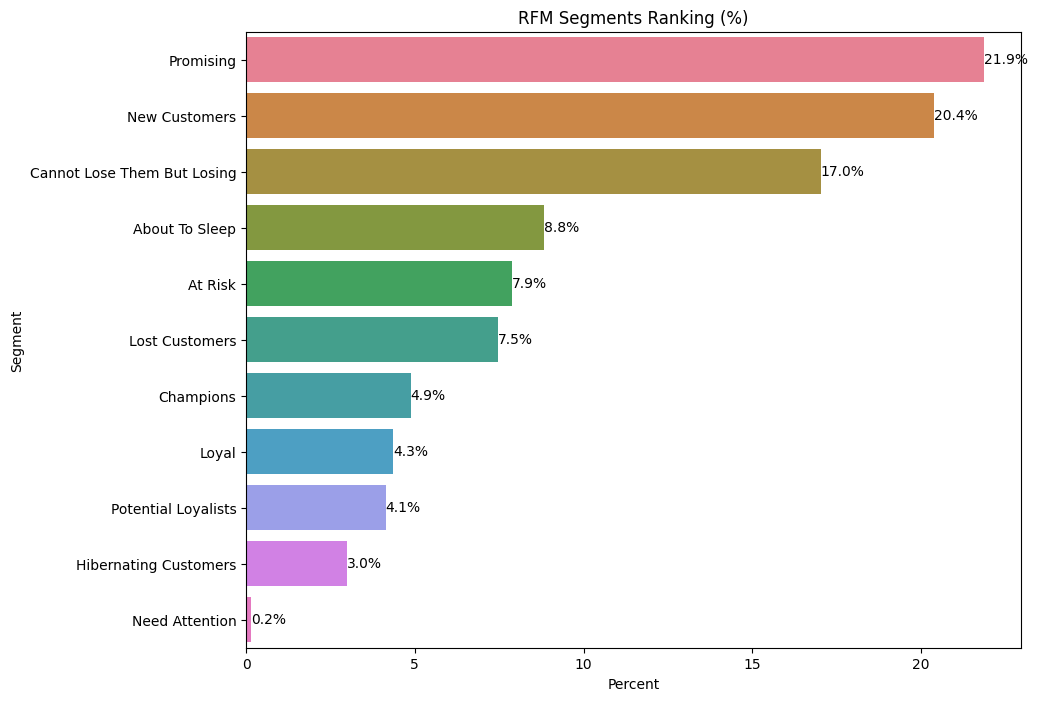

In [91]:
rfm_data_with_percentageSegment = segment_df.sort_values(by='Percent', ascending=False)  # Sort for better visual representation

colors = sns.color_palette("husl", len(rfm_data_with_percentageSegment))

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x='Percent', 
    y='Segment', 
    data=rfm_data_with_percentageSegment, 
    palette=colors
)

plt.title('RFM Segments Ranking (%)')
plt.xlabel('Percent')
plt.ylabel('Segment')

for p in ax.patches:
    bar_width = p.get_width()
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,
            f'{bar_width:.1f}%', 
            va='center', ha='left')
    
plt.show()

In [92]:
data_6 = data_bills_deep_analytics.copy()

In [93]:
# Breaking down the calculation step by step to calculate average_customer_lifespan:
# Step 1 - Calculate the products of period number and customer count for each cohort period.

#based on above
cohort_lifespan = cohort_counts.copy()
for i in cohort_lifespan.columns:
    cohort_lifespan[i] = cohort_lifespan[i] * i

# Step 2 - Sum these products for each cohort.
cohort_lifetime_months = cohort_lifespan.sum(axis=1)

# Step 3 - Sum the initial customer counts across all cohorts.
total_customers = cohort_counts[0].sum()

# Step 4 - Compute the average customer lifespan.
average_customer_lifespan = cohort_lifetime_months.sum() / total_customers

print(f'The average customer lifespan is: {average_customer_lifespan} months')

The average customer lifespan is: 2.9507591300779645 months


In [94]:
# 1. Timeframe: Assuming the data covers the full timeframe of interest
#    If you want to focus on a specific period adjust the dataframe accordingly.

# 2. Average purchase value
average_purchase_value = data_6['s_grand_total'].sum() / data_6['s_grand_total'].count()

# 3. Average purchase frequency rate
average_purchase_frequency = data_6['s_grand_total'].count() / data_6['customer_id'].nunique()

# 4. Customer value
customer_value = average_purchase_value * average_purchase_frequency

# 5. Average customer lifespan: You'd typically need historical data to calculate this.
# Here, we will need to figure out the repeat purchase rate or use industry benchmarks if we lack historical data.
# Assuming you somehow computed this value:

# average_customer_lifespan = # calculated
# 6. Calculate CLV
CLV = customer_value * average_customer_lifespan
CLV

2319239.54751035

In [95]:
data_6 = pd.merge(data_5, rfm, on='customer_id')

In [96]:
columns_to_drop = ['to_user_province_id', 'to_user_relationship_id', 'to_user_occasion_id', 'to_user_relative_id', 's_profit_in_USD', 'to_province']

# Bỏ các cột khỏi DataFrame
data_6 = data_6.drop(columns=columns_to_drop)
data_6

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_date,create_info_created,s_profit,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment
0,5e3bf200f80636dc108b4569,5e3bf1fff80636dc108b4567,6066c157066c9a03055f2b10,VN,345000.0,0.0,63000.0,2020-02-07 04:00:00+00:00,2020-02-06 11:01:19.401000+00:00,63000.0,1357,1,63000.0,1,1,3,113,5,Cannot Lose Them But Losing
1,5e3cb59cf8063622188b4569,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,697500.0,0.0,136500.0,2020-02-07 05:00:00+00:00,2020-02-07 00:55:55.123000+00:00,136500.0,670,3,392500.0,2,5,5,255,12,At Risk
2,5e92a11ef80636ea3f8b4569,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,560000.0,0.0,100000.0,2020-04-12 09:00:00+00:00,2020-04-12 05:03:26.818000+00:00,100000.0,670,3,392500.0,2,5,5,255,12,At Risk
3,61c12da359801f575954bd29,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,616000.0,0.0,156000.0,2021-12-25 01:00:00+00:00,2021-12-21 01:28:03+00:00,156000.0,670,3,392500.0,2,5,5,255,12,At Risk
4,5e3e59d5f80636da078b4568,5e3a76db9d9b35bf7a8b4567,6066c157066c9a03055f2b10,VN,420000.0,0.0,72000.0,2020-02-08 12:00:00+00:00,2020-02-08 06:48:52.854000+00:00,72000.0,972,2,132000.0,2,4,4,244,10,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,6535d8144a6a4d4fa005a6ae,6405c7adf2497cd09b02b0f6,6066c157066c9a03055f2b10,VN,210000.0,0.0,26000.0,2023-10-23 09:00:00+00:00,2023-10-23 02:19:00.226000+00:00,26000.0,2,3,157500.0,5,5,4,554,14,Champions
3700,6535d8144a6a4d4fa005a6ac,6405c7adf2497cd09b02b0f6,6066ce023a550774f46d43e3,VN,315000.0,0.0,70500.0,2023-10-23 11:00:00+00:00,2023-10-23 02:20:19.189000+00:00,70500.0,2,3,157500.0,5,5,4,554,14,Champions
3701,6536340b685b663e520da7e3,65362f2f058e39e1cf0ae5f3,6066c157066c9a03055f2b10,VN,691200.0,0.0,161200.0,2023-10-24 01:00:00+00:00,2023-10-23 08:51:23.114000+00:00,161200.0,1,2,191650.0,5,4,4,544,13,Champions
3702,6536340b685b663e520da7e2,65362f2f058e39e1cf0ae5f3,6066cd65ca52cc506817d471,VN,178200.0,0.0,30450.0,2023-10-24 11:00:00+00:00,2023-10-23 08:51:23.114000+00:00,30450.0,1,2,191650.0,5,4,4,544,13,Champions


In [97]:
data_6['avg_order_value'] = data_6['MonetaryValue'] / data_6['Frequency']

In [98]:
purchase_frequency=sum(data_6['Frequency'])/data_6.shape[0]

In [99]:
repeat_rate=data_6[data_6.Frequency > 1].shape[0]/data_6.shape[0]

In [100]:
churn_rate=1-repeat_rate

In [101]:
print('buying freq: ', purchase_frequency, '\n','repeat rate: ',repeat_rate*100,'\n', 'churn rate: ',churn_rate*100)

buying freq:  3.4190064794816415 
 repeat rate:  48.83909287257019 
 churn rate:  51.1609071274298


In [102]:
data_6['profit_margin']=data_6['MonetaryValue'] * data_6['s_profit'] / data_6['s_grand_total'] * 100

In [103]:
data_6['CLV']=(data_6['avg_order_value']*purchase_frequency)/churn_rate

In [104]:
data_6

,_id,customer_id,product_id,country_id,s_grand_total,s_discount_money,s_commission,to_user_date,create_info_created,s_profit,...,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,Segment,avg_order_value,profit_margin,CLV
0,5e3bf200f80636dc108b4569,5e3bf1fff80636dc108b4567,6066c157066c9a03055f2b10,VN,345000.0,0.0,63000.0,2020-02-07 04:00:00+00:00,2020-02-06 11:01:19.401000+00:00,63000.0,...,63000.0,1,1,3,113,5,Cannot Lose Them But Losing,63000.000000,1.150435e+06,4.210195e+05
1,5e3cb59cf8063622188b4569,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,697500.0,0.0,136500.0,2020-02-07 05:00:00+00:00,2020-02-07 00:55:55.123000+00:00,136500.0,...,392500.0,2,5,5,255,12,At Risk,130833.333333,7.681183e+06,8.743395e+05
2,5e92a11ef80636ea3f8b4569,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,560000.0,0.0,100000.0,2020-04-12 09:00:00+00:00,2020-04-12 05:03:26.818000+00:00,100000.0,...,392500.0,2,5,5,255,12,At Risk,130833.333333,7.008929e+06,8.743395e+05
3,61c12da359801f575954bd29,5e3cb59bf8063622188b4567,6066c157066c9a03055f2b10,VN,616000.0,0.0,156000.0,2021-12-25 01:00:00+00:00,2021-12-21 01:28:03+00:00,156000.0,...,392500.0,2,5,5,255,12,At Risk,130833.333333,9.939935e+06,8.743395e+05
4,5e3e59d5f80636da078b4568,5e3a76db9d9b35bf7a8b4567,6066c157066c9a03055f2b10,VN,420000.0,0.0,72000.0,2020-02-08 12:00:00+00:00,2020-02-08 06:48:52.854000+00:00,72000.0,...,132000.0,2,4,4,244,10,At Risk,66000.000000,2.262857e+06,4.410681e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,6535d8144a6a4d4fa005a6ae,6405c7adf2497cd09b02b0f6,6066c157066c9a03055f2b10,VN,210000.0,0.0,26000.0,2023-10-23 09:00:00+00:00,2023-10-23 02:19:00.226000+00:00,26000.0,...,157500.0,5,5,4,554,14,Champions,52500.000000,1.950000e+06,3.508496e+05
3700,6535d8144a6a4d4fa005a6ac,6405c7adf2497cd09b02b0f6,6066ce023a550774f46d43e3,VN,315000.0,0.0,70500.0,2023-10-23 11:00:00+00:00,2023-10-23 02:20:19.189000+00:00,70500.0,...,157500.0,5,5,4,554,14,Champions,52500.000000,3.525000e+06,3.508496e+05
3701,6536340b685b663e520da7e3,65362f2f058e39e1cf0ae5f3,6066c157066c9a03055f2b10,VN,691200.0,0.0,161200.0,2023-10-24 01:00:00+00:00,2023-10-23 08:51:23.114000+00:00,161200.0,...,191650.0,5,4,4,544,13,Champions,95825.000000,4.469615e+06,6.403841e+05
3702,6536340b685b663e520da7e2,65362f2f058e39e1cf0ae5f3,6066cd65ca52cc506817d471,VN,178200.0,0.0,30450.0,2023-10-24 11:00:00+00:00,2023-10-23 08:51:23.114000+00:00,30450.0,...,191650.0,5,4,4,544,13,Champions,95825.000000,3.274827e+06,6.403841e+05


In [105]:
segment_clv = data_6.groupby('Segment')['CLV'].mean()

In [106]:
segment_clv

Segment
About To Sleep                 2.108500e+03
At Risk                        8.020615e+05
Cannot Lose Them But Losing    9.905080e+05
Champions                      8.650179e+05
Hibernating Customers         -7.410665e+05
Lost Customers                -1.394830e+06
Loyal                          7.788542e+05
Need Attention                 2.404991e+05
New Customers                 -1.868302e+06
Potential Loyalists           -1.243037e+06
Promising                      9.425636e+05
Name: CLV, dtype: float64

In [107]:
segment_clv = {
    "Segment": [
        "About To Sleep",
        "At Risk",
        "Cannot Lose Them But Losing",
        "Champions",
        "Hibernating Customers",
        "Lost Customers",
        "Loyal",
        "Need Attention",
        "New Customers",
        "Potential Loyalists",
        "Promising"
    ],
    "CLV": [
        2.223041e+06,
        4.677886e+06,
        5.313830e+06,
        4.316649e+06,
        1.957465e+05,
        -9.514373e+05,
        4.350388e+06,
        1.739983e+06,
        -1.337996e+06,
        -1.255464e+06,
        4.628892e+06
    ]
}

df_segment_clv = pd.DataFrame(segment_clv)

df_segment_clv

,Segment,CLV
0,About To Sleep,2223041.0
1,At Risk,4677886.0
2,Cannot Lose Them But Losing,5313830.0
3,Champions,4316649.0
4,Hibernating Customers,195746.5
5,Lost Customers,-951437.3
6,Loyal,4350388.0
7,Need Attention,1739983.0
8,New Customers,-1337996.0
9,Potential Loyalists,-1255464.0


In [108]:
segment_df

,Segment,Count,Percent
0,Promising,533,21.87
1,New Customers,497,20.39
2,Cannot Lose Them But Losing,415,17.03
3,About To Sleep,215,8.82
4,At Risk,192,7.88
5,Lost Customers,182,7.47
6,Champions,119,4.88
7,Loyal,106,4.35
8,Potential Loyalists,101,4.14
9,Hibernating Customers,73,3.00


In [109]:
df_segment_clv = pd.merge(df_segment_clv, segment_df, on='Segment')[['Segment', 'CLV', 'Percent']].rename(columns={'Percent': 'Percent_Segment'})

In [110]:
df_segment_clv['Percent_Segment'] = df_segment_clv['Percent_Segment'] / 100
df_segment_clv

,Segment,CLV,Percent_Segment
0,About To Sleep,2223041.0,0.0882
1,At Risk,4677886.0,0.0788
2,Cannot Lose Them But Losing,5313830.0,0.1703
3,Champions,4316649.0,0.0488
4,Hibernating Customers,195746.5,0.0300
5,Lost Customers,-951437.3,0.0747
6,Loyal,4350388.0,0.0435
7,Need Attention,1739983.0,0.0016
8,New Customers,-1337996.0,0.2039
9,Potential Loyalists,-1255464.0,0.0414


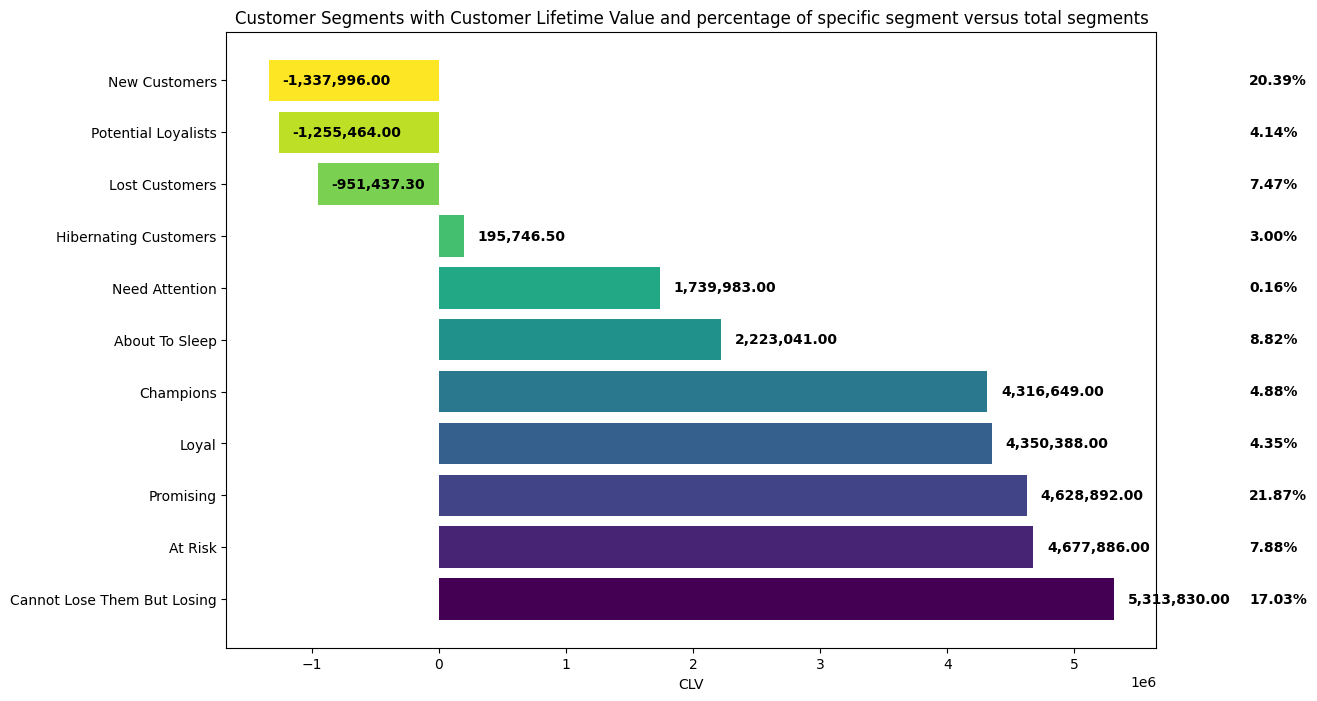

In [111]:
segments = df_segment_clv['Segment']
clv_values = df_segment_clv['CLV']
percent_values = df_segment_clv['Percent_Segment']


sorted_indices = clv_values.argsort()[::-1]
segments = segments.iloc[sorted_indices]
clv_values = clv_values.iloc[sorted_indices]
percent_values = percent_values.iloc[sorted_indices]


fig, ax1 = plt.subplots(figsize=(12, 8))


colors = plt.cm.viridis(np.linspace(0, 1, len(segments)))
bars = ax1.barh(segments, clv_values, color=colors, label='CLV')


for bar, value in zip(bars, clv_values):
    ax1.text(bar.get_width() + max(clv_values) * 0.02, bar.get_y() + bar.get_height()/2, f'{value:,.2f}', color='black', va='center', fontweight='bold')

ax1.set_xlabel('CLV')
ax1.set_title('Customer Segments with Customer Lifetime Value and percentage of specific segment versus total segments')


for i, (seg, perc) in enumerate(zip(segments, percent_values)):
    ax1.text(max(clv_values) * 1.2, i, f'{perc:.2%}', color='black', va='center', fontweight='bold')

plt.show()

* References:
1. <a href="https://www.datacamp.com/tutorial/customer-life-time-value">Customer lifetime value with Python</a>
2. <a href="https://www.datacamp.com/tutorial/introduction-customer-segmentation-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=680291483907&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=1028581&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-bfcm23&gad_source=1&gclid=Cj0KCQiApOyqBhDlARIsAGfnyMpt_5fxr9iTRY3R4xXWk9sHxmQT4bcYIPd8gmck6kQLy_2qh7bug5IaAm4uEALw_wcB">RFM model with Python</a>
3. <a href="https://documentation.bloomreach.com/engagement/docs/rfm-segmentation">RFM model scoring</a>
4. <a href="https://clevertap.com/blog/customer-lifetime-value/">Customer lifetime value explaination</a>
5. <a href="https://blog.hubspot.com/service/customer-retention-metrics#:~:text=Retention%20rate%20is%20the%20ratio,have%20a%20lower%20retention%20rate.">10 customer retention metrics & How to measure them</a>